In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats

from yellowbrick.cluster.elbow import kelbow_visualizer

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn import datasets
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score, silhouette_samples

import warnings

In [2]:
warnings.filterwarnings('ignore')

In [3]:
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 30)
#pd.reset_option('all')
#pd.set_option('float_format', '{:.2f}'.format)

In [11]:
# ver.3
df_ver3 = pd.read_csv('N:/개인/DA/내배캠/5. 최종 프로젝트/after_cleansing/통합본/6. real_final_dataset/real_fin_dataset(ver.3)(24.04.18).csv', index_col=0)

# for streamlit dataset
df_ver3_info = df_ver3[['Platform', 'Number', 'Store', 'Address', 'Addr', 'ID', 'Date', 'Review_text', 'Review_score', 'Time', 'sentiment']]

In [4]:
# ver.4
df_anal = pd.read_csv('N:/개인/DA/내배캠/5. 최종 프로젝트/after_cleansing/통합본/6. real_final_dataset/real_fin_dataset(ver.4)(24.04.18)(review_counts, review_score, slope만 스케일링).csv', index_col=0)

In [6]:
# ver.5
df_anal = pd.read_csv('N:/개인/DA/내배캠/5. 최종 프로젝트/after_cleansing/통합본/6. real_final_dataset/real_fin_dataset(ver.5)(24.04.18)(sentiment 제외 모두 스케일링).csv', index_col=0)

In [5]:
# 최종 선정 컬럼
df_anal = df_anal[['Review_score', 'bread', 'beverage', 'view', 'atmosphere', 'friendly', 'clean_store', 'restroom_clean', 'parking', 'spacious_store', 'plenty_seats', 'comfortable_seats',\
     'special_menu', 'photo', 'good_music', 'reservation_possible', 'beautiful_interior', 'price', 'wait']]

In [12]:
df_ver3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15227 entries, 0 to 15226
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Platform              15227 non-null  object 
 1   Number                15227 non-null  int64  
 2   Store                 15227 non-null  object 
 3   Address               15227 non-null  object 
 4   Addr                  15227 non-null  object 
 5   Review_score          15227 non-null  float64
 6   Review_counts         15227 non-null  int64  
 7   ID                    15227 non-null  object 
 8   Date                  15227 non-null  object 
 9   Review_text           15227 non-null  object 
 10  Time                  15227 non-null  object 
 11  slope                 15227 non-null  float64
 12  bread                 15227 non-null  float64
 13  beverage              15227 non-null  float64
 14  vegan                 15227 non-null  float64
 15  no_senior          

In [6]:
df_anal

,Review_score,bread,beverage,view,atmosphere,friendly,clean_store,restroom_clean,parking,spacious_store,plenty_seats,comfortable_seats,special_menu,photo,good_music,reservation_possible,beautiful_interior,price,wait
0,-0.041896,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,-0.041896,10.0,100.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,-0.041896,0.0,-50.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,-0.041896,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,-0.041896,10.0,0.0,0,0,0,100,0,0,0,0,0,0,0,0,0,100,100,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15222,0.266992,50.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
15223,0.266992,100.0,100.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
15224,0.266992,50.0,0.0,0,0,50,0,0,0,0,0,0,0,0,0,0,0,50,0
15225,0.266992,50.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


바로 clustering 단계로 넘어가면 됨

# EDA

In [142]:
df_ver3.drop(['Platform', 'Number', 'Store', 'Address', 'Addr', 'ID', 'Date', 'Review_text', 'Review_counts', 'Time', 'bread_name', 'slope', 'vegan', 'no_senior', 'no_kids', 'pet', 'whole_wheat', 'unique_concept', 'health', 'sentiment'], axis=1, inplace=True)
df_ver3

,Review_score,bread,beverage,view,atmosphere,friendly,clean_store,restroom_clean,parking,spacious_store,plenty_seats,comfortable_seats,special_menu,photo,good_music,reservation_possible,beautiful_interior,price,wait
0,4.3,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,4.3,10.0,100.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,4.3,0.0,-50.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4.3,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4.3,10.0,0.0,0,0,0,100,0,0,0,0,0,0,0,0,0,100,100,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15222,4.4,50.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
15223,4.4,100.0,100.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
15224,4.4,50.0,0.0,0,0,50,0,0,0,0,0,0,0,0,0,0,0,50,0
15225,4.4,50.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [140]:
df_ver3.describe()

,Review_score,Review_counts,bread,beverage,view,atmosphere,friendly,clean_store,restroom_clean,parking,spacious_store,plenty_seats,comfortable_seats,special_menu,photo,good_music,reservation_possible,beautiful_interior,price,wait
count,15227.000000,15227.000000,15227.000000,15227.000000,15227.000000,15227.000000,15227.000000,15227.000000,15227.000000,15227.00000,15227.000000,15227.000000,15227.000000,15227.000000,15227.000000,15227.000000,15227.000000,15227.000000,15227.000000,15227.000000
mean,4.313563,1227.422736,33.668155,12.556643,2.142904,6.593551,5.012806,1.163066,0.216720,0.00000,2.326131,0.661982,0.495173,0.130164,0.604847,0.243646,0.228541,3.404479,-0.725750,-0.723058
std,0.323753,2254.198131,44.333654,28.975422,13.617316,23.581534,26.860891,14.315463,7.412012,8.10009,15.478719,9.483153,9.262920,3.375023,8.418677,5.303083,5.149828,15.949957,18.899804,7.324007
min,2.000000,1.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.00000,-100.000000,-100.000000,-100.000000,0.000000,-100.000000,-100.000000,-100.000000,-50.000000,-100.000000,-100.000000
25%,4.300000,233.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.390000,413.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.430000,1411.000000,80.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,5.000000,20194.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


### 컬럼별 분포 확인

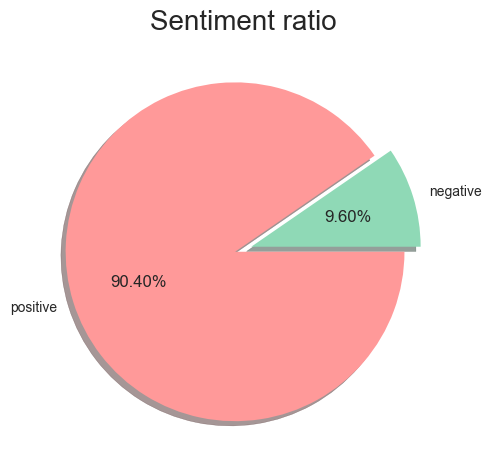

In [92]:
# sentiment
positive = len(df_ver3[df_ver3['sentiment'] == 1]) / len(df_ver3['sentiment'])
negative = len(df_ver3[df_ver3['sentiment'] == 0]) / len(df_ver3['sentiment'])
ratio = [positive, negative]
labels = ['positive', 'negative']
explode = [0.05, 0.05]
colors = ['#ff9999', '#8fd9b6']

plt.title("Sentiment ratio", fontsize=20)
plt.pie(ratio, labels=labels, autopct='%.2f%%', counterclock=False, explode=explode, shadow=True, colors=colors)
plt.show()

##### 컬럼 삭제 이유

'Review_score', 'bread', 'beverage', 'view', 'atmosphere', 'friendly', 'clean_store', 'restroom_clean', 'parking', 'spacious_store', 'plenty_seats', 'comfortable_seats',
'special_menu', 'photo', 'good_music', 'reservation_possible', 'beautiful_interior', 'price', 'wait'

 - **sentiment** : 다른 컬럼들과 상대적으로 상관관계 높아서
 - **vegan, no_senior, no_kids, pet, whole_wheat, health, unique_concept** : 특성이 명확하지 않아서(why? 데이터가 소량 수집되어서)
 - **slope** : 고지대에 위치한 곳은 풍경이 좋은 곳과 연관이 있을 것으로 생각하여 넣었으나 최대 경사도가 12도밖에 되지 않아 유의미한 결과를 확인할 수 없을 것으로 판단돼서
 - **Review_score** : review_counts보다는 review_score가 더 영향을 많이 미칠 것으로 판단되어 review_counts 제거 후 차원 축소 진행했고, 컬럼 제거 전후 차이 없었음

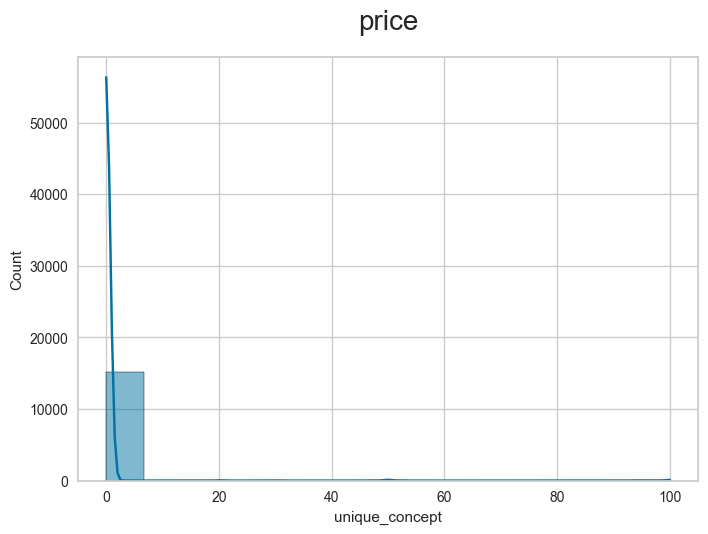

In [231]:
plt.title("price", fontsize=20, pad=20)
sns.histplot(data = df_ver3, x='unique_concept', kde=True)
plt.show()

### 컬럼별 0값 제거한 상태에서의 분포 확인

c:\Users\jeong hee lee\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


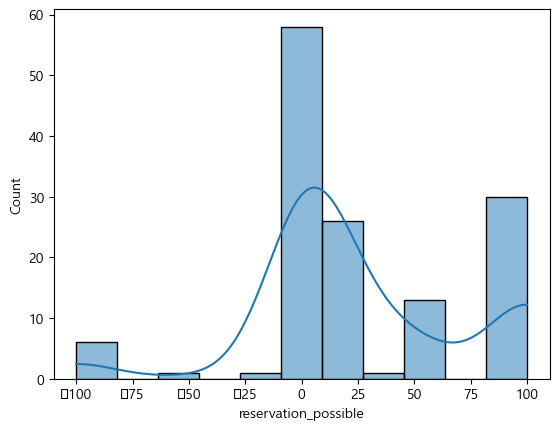

In [193]:
bb = df[df['reservation_possible']!=0]

sns.histplot(data = bb, x='reservation_possible', kde=True)
plt.show()

### 전체 컬럼 분포 확인

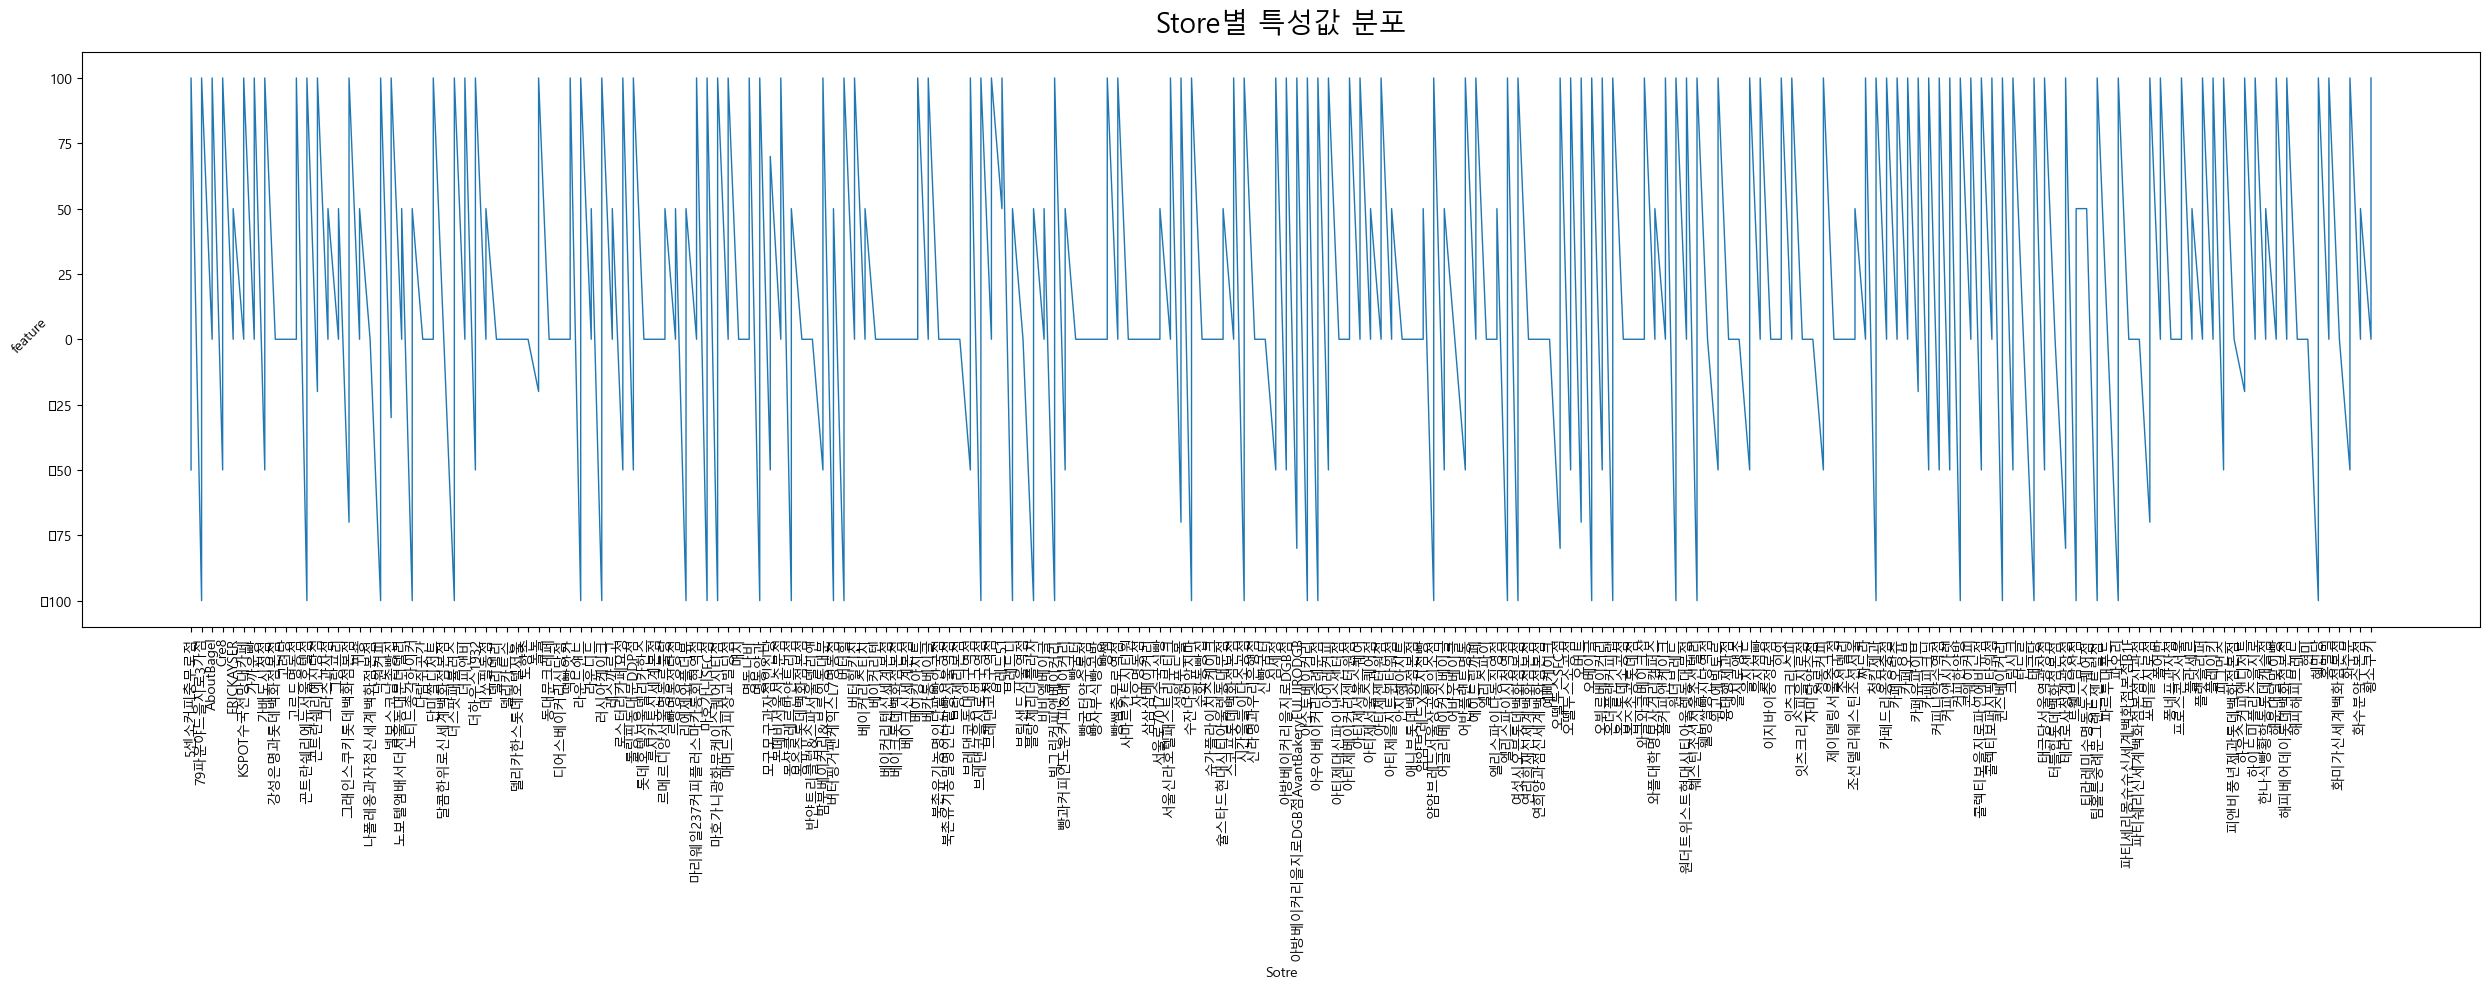

In [180]:
plt.figure(figsize=(25,10))
sns.lineplot(data=df, x='Store', y='beverage', estimator=None, lw=1)
plt.title('Store별 특성값 분포', fontsize=20, pad=15)
plt.xlabel('Sotre')
plt.ylabel('feature', rotation=45)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


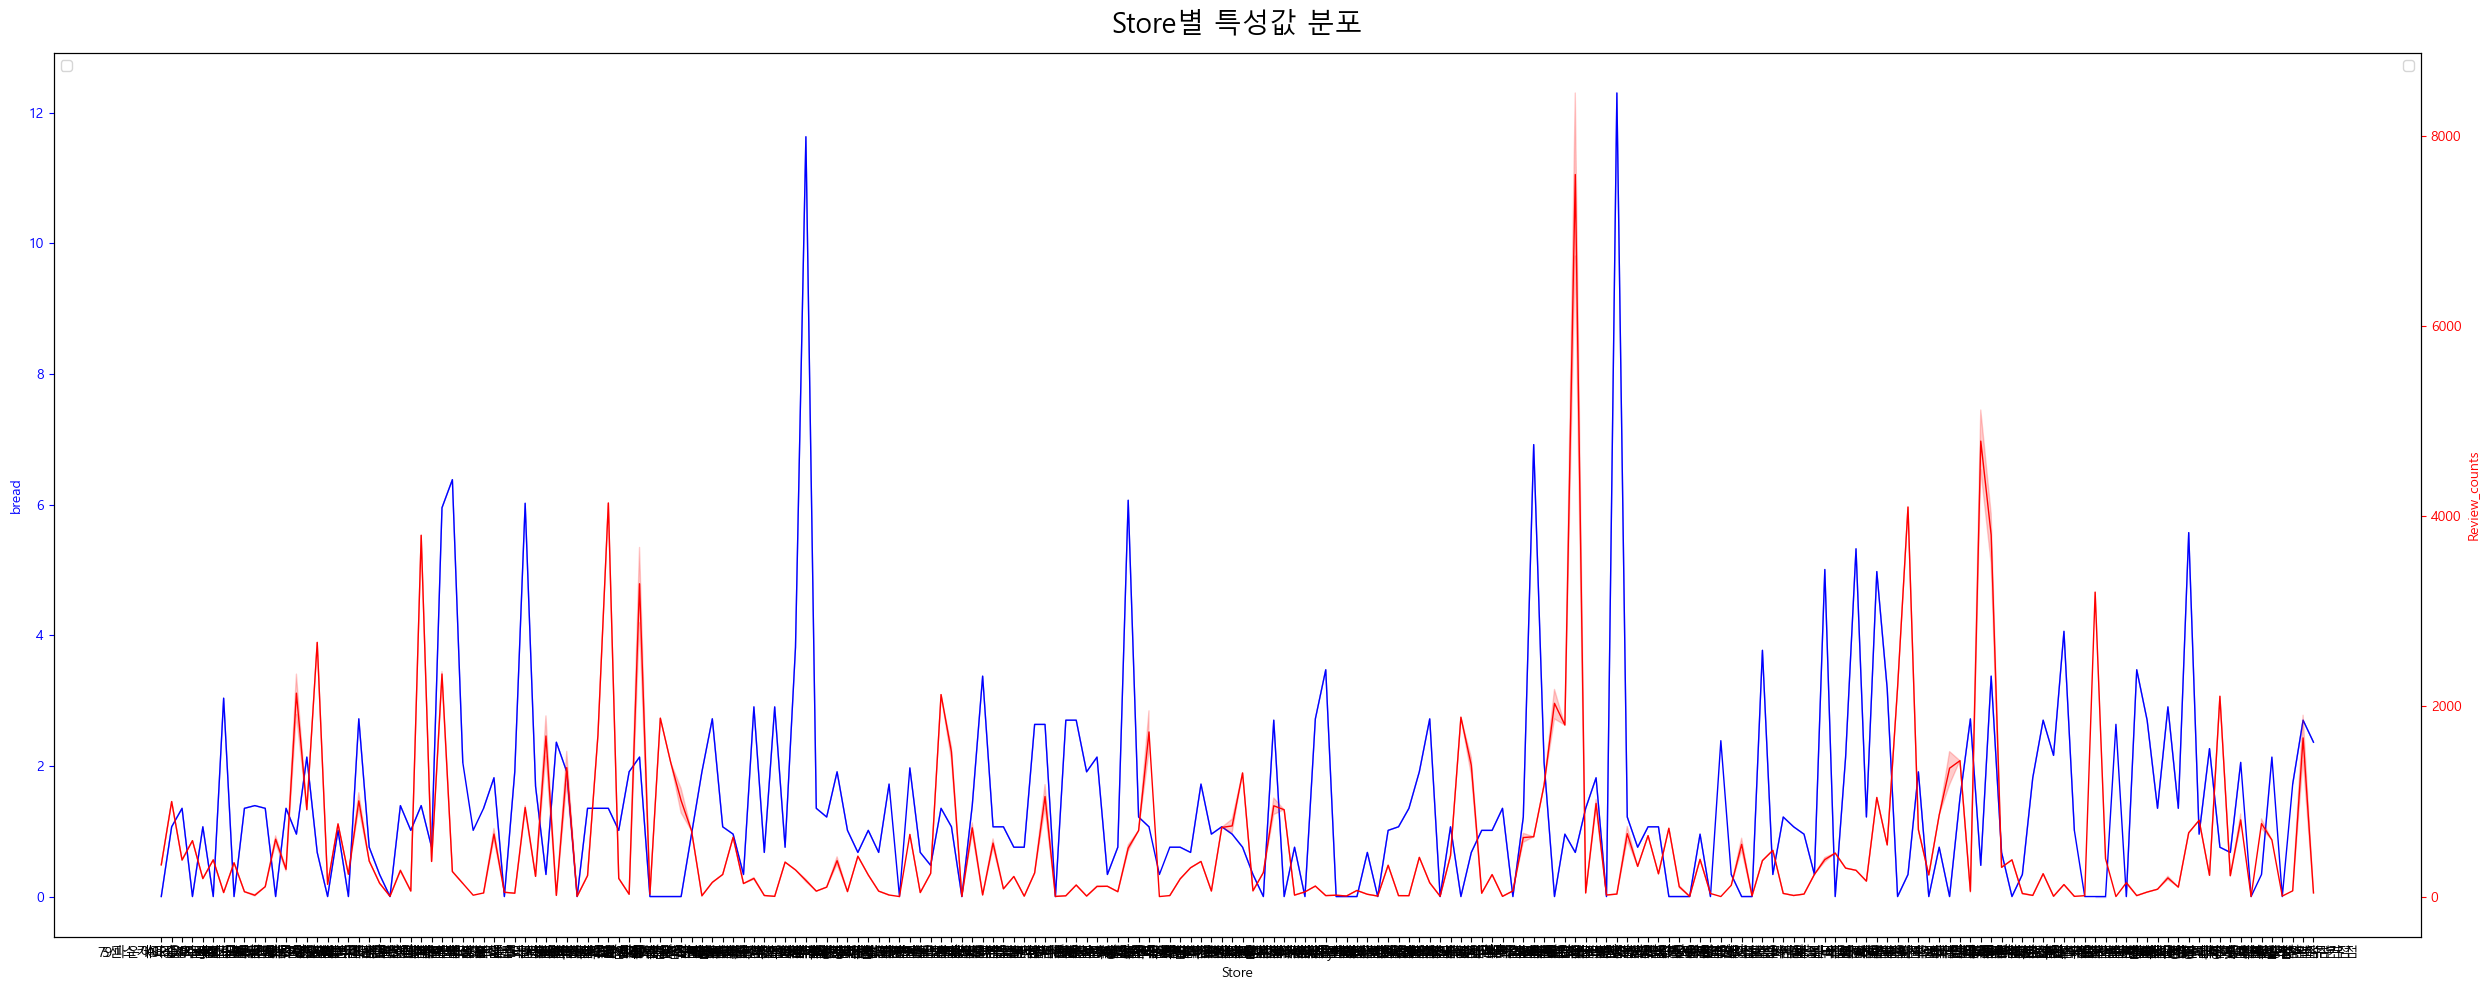

In [111]:
plt.figure(figsize=(25,10))

ax = sns.lineplot(data=df, x='Store', y='slope', color='blue', lw=1)
ax.set_title('Store별 특성값 분포', fontsize=20, pad=15)
ax.set_xlabel('Store')
ax.set_ylabel('bread', color = 'blue')
ax.tick_params(axis='y', colors = 'blue')

ax2 = ax.twinx()
sns.lineplot(data=df, x='Store', y='Review_counts', color='red', lw=1, ax=ax2)
ax2.set_ylabel('Review_counts', color = 'red')
ax2.tick_params(axis='y', colors='red')

ax.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### 컬럼 상관관계 확인

In [208]:
#df_ver3_2 = df_ver3.drop(['Platform', 'Number', 'Store', 'Address', 'Review_text', 'ID', 'Date', 'Time', 'bread_name'], axis=1)
df_ver3_2 = df_ver3_2.drop(['Addr'], axis=1)
df_ver3_2

,Review_score,Review_counts,slope,bread,beverage,vegan,no_senior,no_kids,pet,whole_wheat,view,atmosphere,friendly,clean_store,restroom_clean,parking,spacious_store,plenty_seats,comfortable_seats,special_menu,photo,good_music,reservation_possible,unique_concept,beautiful_interior,price,wait,health,sentiment
0,4.3,334,0.00000,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,4.3,334,0.00000,10.0,100.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,4.3,334,0.00000,0.0,-50.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4.3,334,0.00000,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,4.3,334,0.00000,10.0,0.0,0.0,0,0,0,0,0,0,0,100,0,0,0,0,0,0,0,0,0,0,100,100,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15222,4.4,39,2.36245,50.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
15223,4.4,39,2.36245,100.0,100.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
15224,4.4,39,2.36245,50.0,0.0,0.0,0,0,0,0,0,0,50,0,0,0,0,0,0,0,0,0,0,0,0,50,0,0,1
15225,4.4,39,2.36245,50.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,100,1


<Axes: >

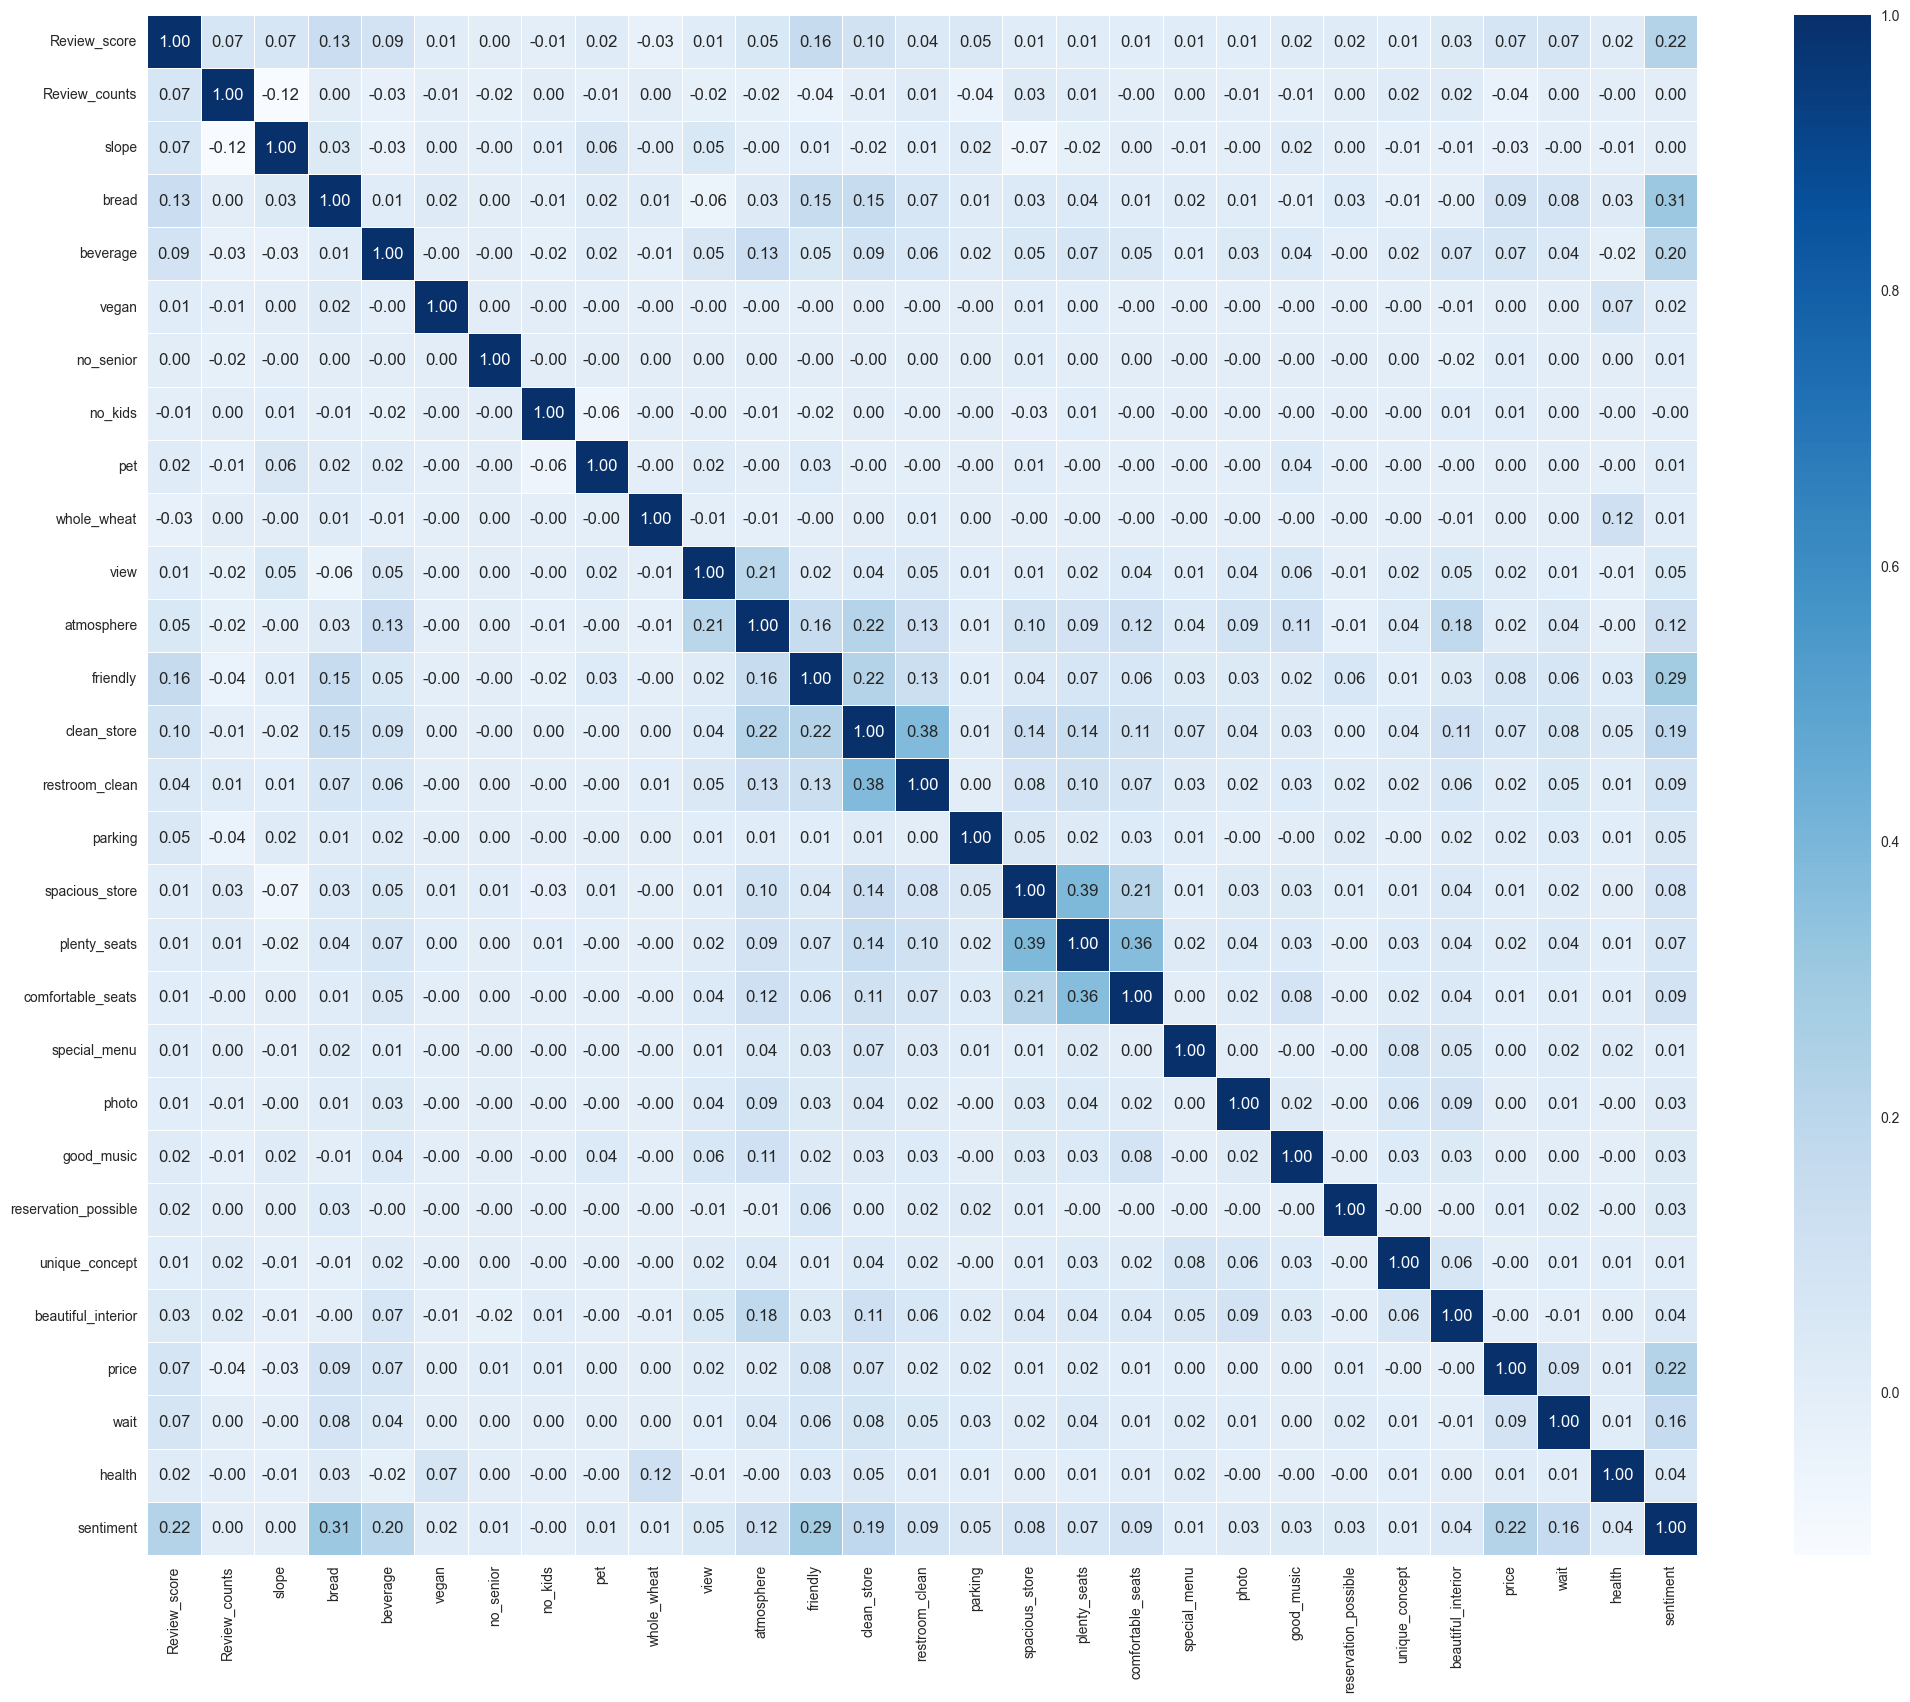

In [210]:
plt.figure(figsize=(25, 20))
sns.heatmap(data = df_ver3_2.corr(), annot=True, fmt= '.2f', linewidths=.5, cmap='Blues')

### 한 눈에 보기

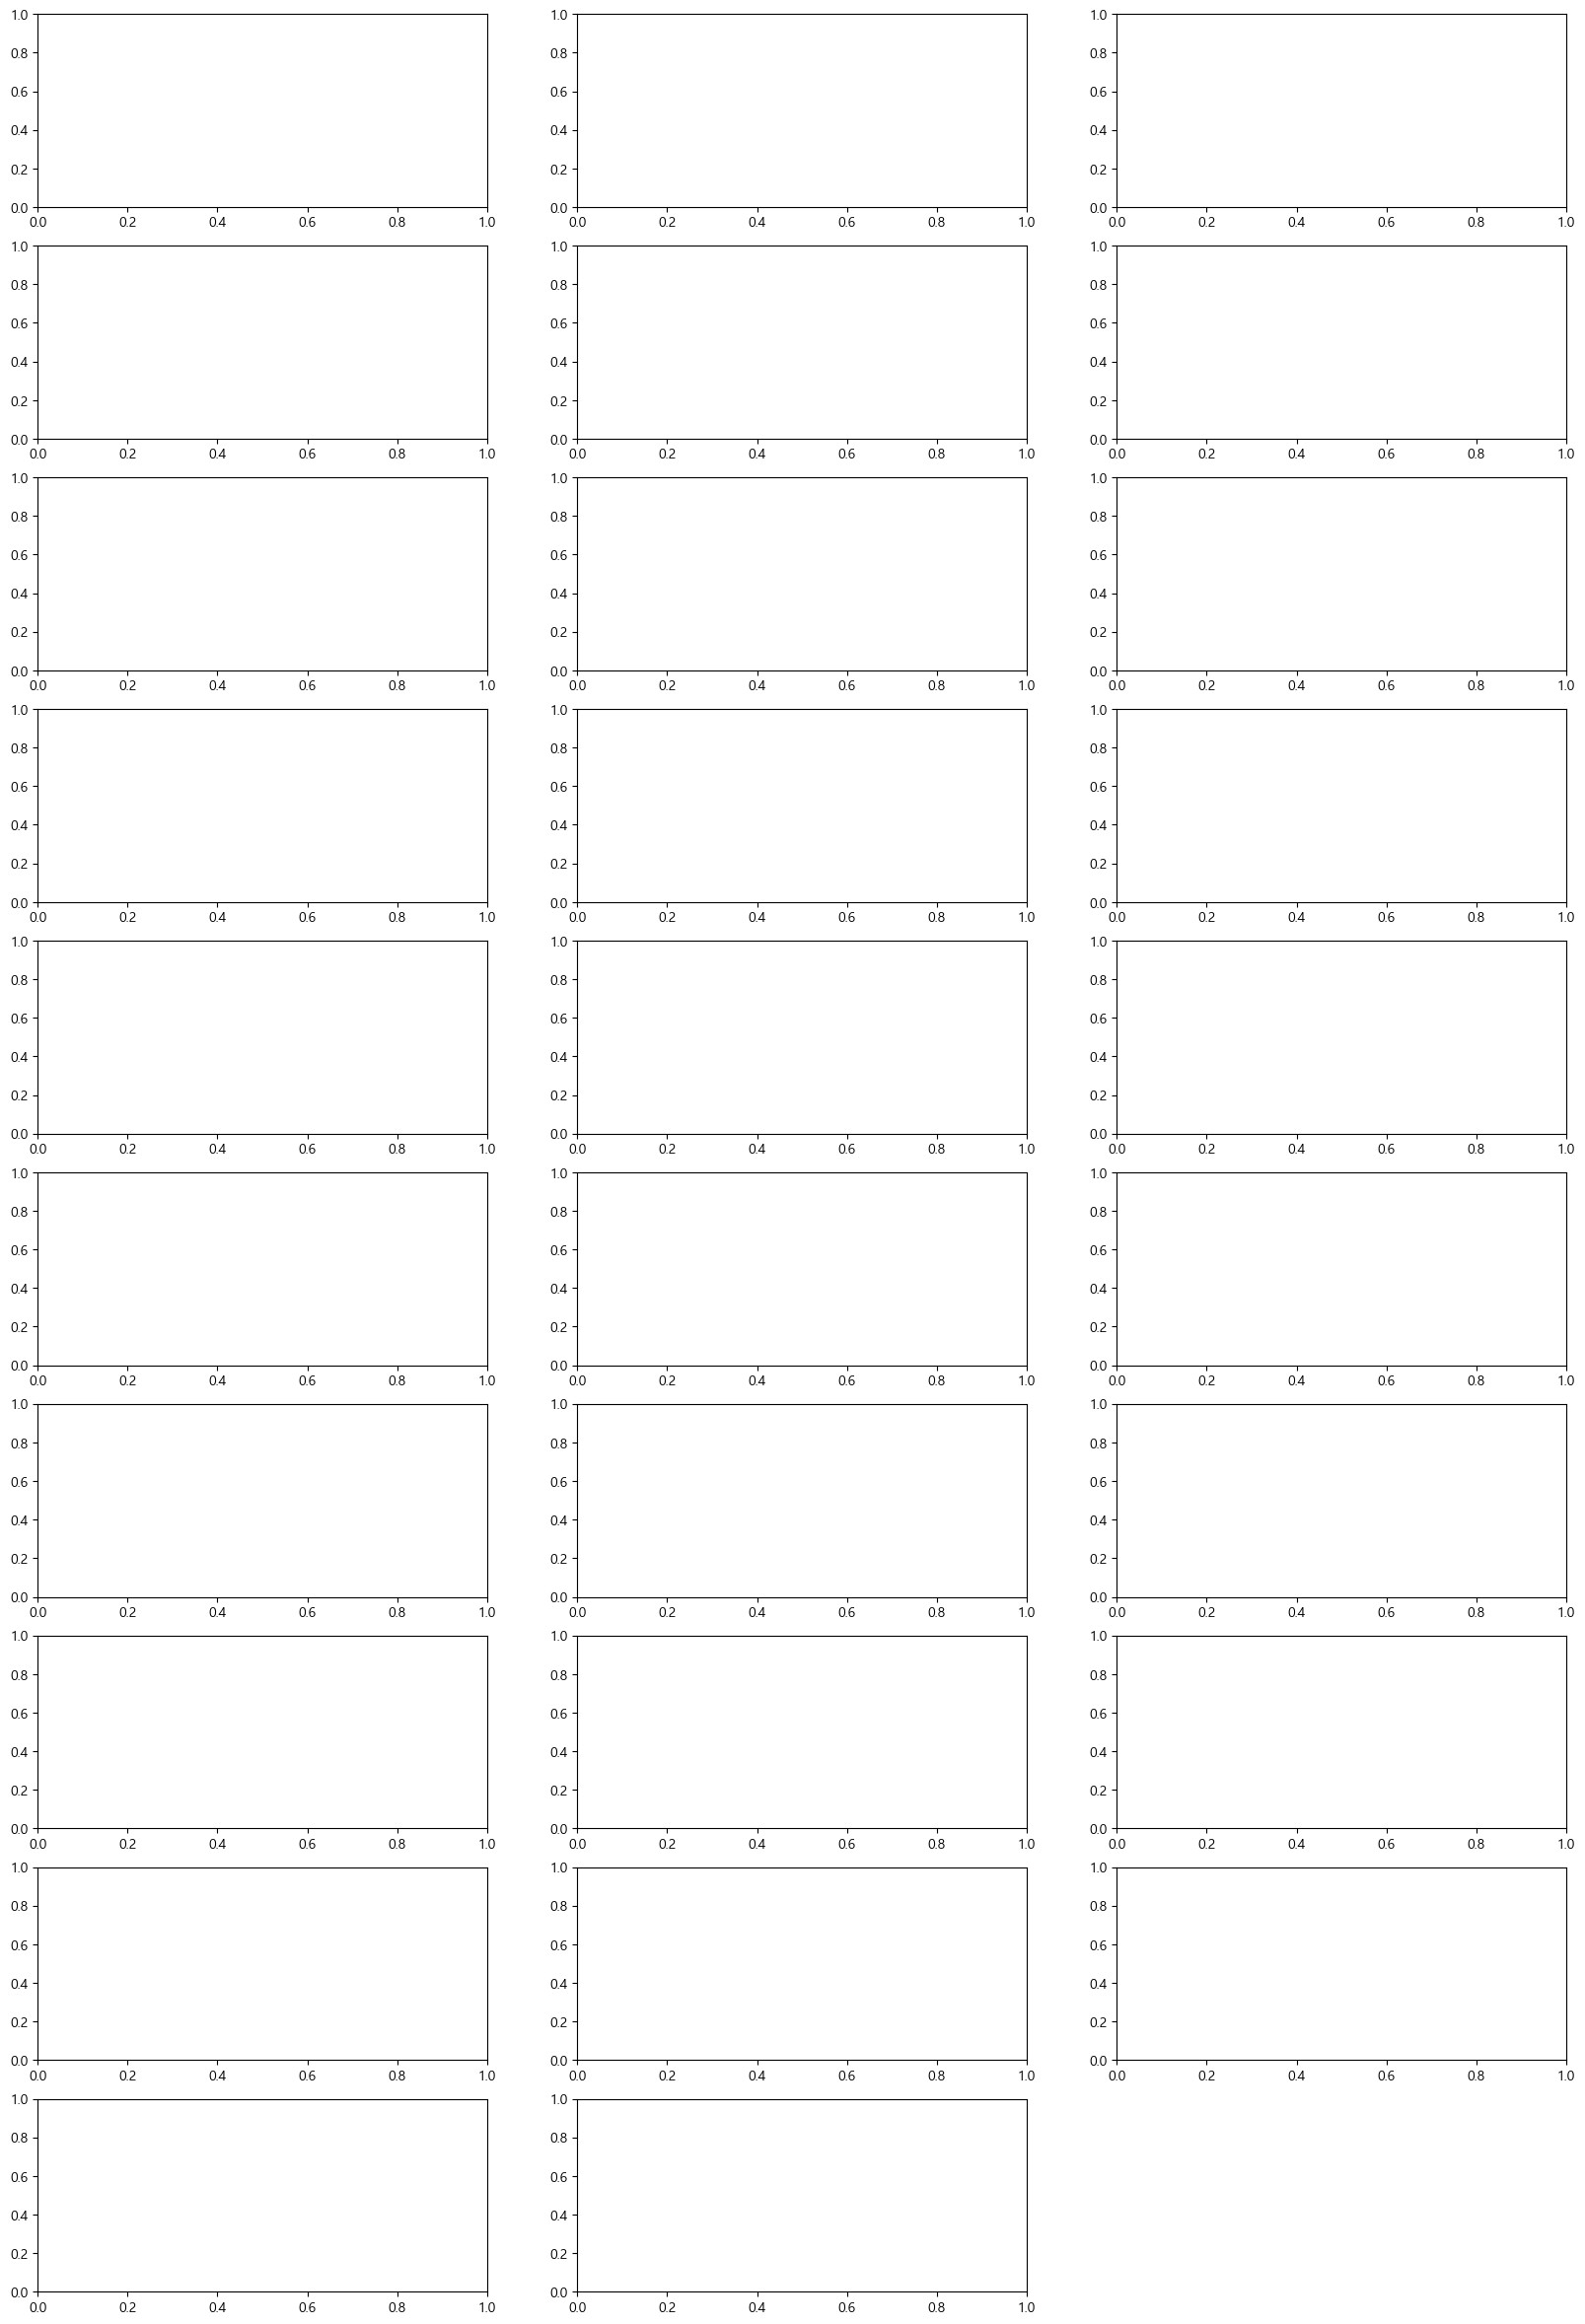

In [10]:
fig = plt.figure(figsize=(20,30))
axes1 = fig.add_subplot(10,3,1)
axes2 = fig.add_subplot(10,3,2)
axes3 = fig.add_subplot(10,3,3)
axes4 = fig.add_subplot(10,3,4)
axes5 = fig.add_subplot(10,3,5)
axes6 = fig.add_subplot(10,3,6)
axes7 = fig.add_subplot(10,3,7)
axes8 = fig.add_subplot(10,3,8)
axes9 = fig.add_subplot(10,3,9)
axes10 = fig.add_subplot(10,3,10)
axes11 = fig.add_subplot(10,3,11)
axes12 = fig.add_subplot(10,3,12)
axes13 = fig.add_subplot(10,3,13)
axes14 = fig.add_subplot(10,3,14)
axes15 = fig.add_subplot(10,3,15)
axes16 = fig.add_subplot(10,3,16)
axes17 = fig.add_subplot(10,3,17)
axes18 = fig.add_subplot(10,3,18)
axes19 = fig.add_subplot(10,3,19)
axes20 = fig.add_subplot(10,3,20)
axes21 = fig.add_subplot(10,3,21)
axes22 = fig.add_subplot(10,3,22)
axes23 = fig.add_subplot(10,3,23)
axes24 = fig.add_subplot(10,3,24)
axes25 = fig.add_subplot(10,3,25)
axes26 = fig.add_subplot(10,3,26)
axes27 = fig.add_subplot(10,3,27)
axes28 = fig.add_subplot(10,3,28)
axes29 = fig.add_subplot(10,3,29)
plt.show()

### 특성별 정규분포 확인

((array([-3.91330934, -3.69373542, -3.57343686, ...,  3.57343686,
          3.69373542,  3.91330934]),
  array([-100., -100., -100., ...,  100.,  100.,  100.])),
 (22.360459259968408, 12.556642805542781, 0.7715409348060587))

c:\Users\jeong hee lee\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
c:\Users\jeong hee lee\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


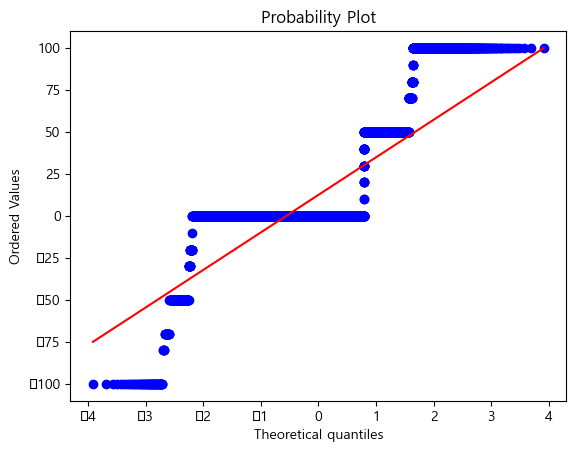

In [88]:
stats.probplot(df['beverage'], dist="norm", plot=plt)

In [132]:
# p값이 0.05보다 낮다 → 귀무 가설 기각(=유의미한 차이가 있다.)
shapiro_test = stats.shapiro(df_ver3['slope'])
print(shapiro_test)
#print('Statistics=%.3f, p=%.3f' % (stat, p))

ShapiroResult(statistic=0.7328909031039205, pvalue=4.155739411490679e-93)


# 추가 전처리

### 1. 컬럼 1점값 변경

In [7]:
# health 컬럼 1점을 10점으로 변경
df.loc[df['ID']=='W0407', 'health'] = 10
df.loc[df['ID']=='sooberior', 'health'] = 10

In [24]:
columns = df.columns

results = []

for i in columns:
    num = len(df[df[i]==1])
    answer = f'{i}의 1 개수는 {num}입니다.'
    results.append(answer)

In [25]:
for result in results:
    print(result)

Platform의 1 개수는 0입니다.
Number의 1 개수는 87입니다.
Store의 1 개수는 0입니다.
Address의 1 개수는 0입니다.
Addr의 1 개수는 0입니다.
Review_score의 1 개수는 0입니다.
Review_counts의 1 개수는 8입니다.
ID의 1 개수는 0입니다.
Date의 1 개수는 0입니다.
Review_text의 1 개수는 0입니다.
Time의 1 개수는 0입니다.
slope의 1 개수는 0입니다.
bread의 1 개수는 0입니다.
beverage의 1 개수는 0입니다.
vegan의 1 개수는 0입니다.
no_senior의 1 개수는 0입니다.
no_kids의 1 개수는 0입니다.
pet의 1 개수는 0입니다.
whole_wheat의 1 개수는 0입니다.
view의 1 개수는 0입니다.
atmosphere의 1 개수는 0입니다.
friendly의 1 개수는 0입니다.
clean_store의 1 개수는 0입니다.
restroom_clean의 1 개수는 0입니다.
parking의 1 개수는 0입니다.
spacious_store의 1 개수는 0입니다.
plenty_seats의 1 개수는 0입니다.
comfortable_seats의 1 개수는 0입니다.
special_menu의 1 개수는 5입니다.
photo의 1 개수는 0입니다.
good_music의 1 개수는 0입니다.
reservation_possible의 1 개수는 0입니다.
unique_concept의 1 개수는 0입니다.
beautiful_interior의 1 개수는 0입니다.
price의 1 개수는 0입니다.
wait의 1 개수는 0입니다.
health의 1 개수는 1입니다.
sentiment의 1 개수는 13765입니다.
bread_name의 1 개수는 0입니다.


In [23]:
df['beautiful_interior'] = df['beautiful_interior'].replace(1, 0)

In [18]:
df.loc[df['ID'] == '방문했어요', 'special_menu'] = 1
df.loc[df['ID'] == '우휴68', 'special_menu'] = 1
df.loc[df['ID'] == '얍958', 'special_menu'] = 100

### 2. 이상치 제거

In [27]:
df[df['bread']==450]

,Platform,Number,Store,Address,Addr,Review_score,Review_counts,ID,Date,Review_text,Time,slope,bread,beverage,vegan,no_senior,no_kids,pet,whole_wheat,view,atmosphere,friendly,clean_store,restroom_clean,parking,spacious_store,plenty_seats,comfortable_seats,special_menu,photo,good_music,reservation_possible,unique_concept,beautiful_interior,price,wait,health,sentiment,bread_name
2288,naver,37,떡빵앗간,"서울 중구 청계천로 318 다동, 1층 54,55호",서울 중구,4.38,213,qa****,23.4.21.금,맛있었어요!!! ㅎㅎ,2024-04-08 - 00:46:27,1.68751,450.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,None


In [28]:
df.loc[(df['Review_text']=='맛있었어요!!! ㅎㅎ') & (df['Store']=='떡빵앗간'), 'bread'] = 50

In [29]:
df[df['Review_text']=='맛있었어요!!! ㅎㅎ']

,Platform,Number,Store,Address,Addr,Review_score,Review_counts,ID,Date,Review_text,Time,slope,bread,beverage,vegan,no_senior,no_kids,pet,whole_wheat,view,atmosphere,friendly,clean_store,restroom_clean,parking,spacious_store,plenty_seats,comfortable_seats,special_menu,photo,good_music,reservation_possible,unique_concept,beautiful_interior,price,wait,health,sentiment,bread_name
2288,naver,37,떡빵앗간,"서울 중구 청계천로 318 다동, 1층 54,55호",서울 중구,4.38,213,qa****,23.4.21.금,맛있었어요!!! ㅎㅎ,2024-04-08 - 00:46:27,1.68751,50.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,None


### 3. null값 채우기

In [30]:
df[df['ID']=='뭐래76']

,Platform,Number,Store,Address,Addr,Review_score,Review_counts,ID,Date,Review_text,Time,slope,bread,beverage,vegan,no_senior,no_kids,pet,whole_wheat,view,atmosphere,friendly,clean_store,restroom_clean,parking,spacious_store,plenty_seats,comfortable_seats,special_menu,photo,good_music,reservation_possible,unique_concept,beautiful_interior,price,wait,health,sentiment,bread_name
10832,naver,166,카페피크닉,서울 중구 퇴계로6가길 30 1층 피크닉,서울 중구,4.4,1043,뭐래76,23.1.4.수,분위기 좋고 음료도 맛있어요 : ) 집중하기 좋은것같아요 👍,2024-04-08 - 00:15:34,4.97441,0.0,50.0,NaN,0,0,0,0,0,100,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,None


In [31]:
df.loc[df['ID']=='희정', 'bread'] = 0
df.loc[df['ID']=='뭐래76', 'bread'] = 0

In [32]:
df[df['vegan'].isna()==True]

,Platform,Number,Store,Address,Addr,Review_score,Review_counts,ID,Date,Review_text,Time,slope,bread,beverage,vegan,no_senior,no_kids,pet,whole_wheat,view,atmosphere,friendly,clean_store,restroom_clean,parking,spacious_store,plenty_seats,comfortable_seats,special_menu,photo,good_music,reservation_possible,unique_concept,beautiful_interior,price,wait,health,sentiment,bread_name
10832,naver,166,카페피크닉,서울 중구 퇴계로6가길 30 1층 피크닉,서울 중구,4.4,1043,뭐래76,23.1.4.수,분위기 좋고 음료도 맛있어요 : ) 집중하기 좋은것같아요 👍,2024-04-08 - 00:15:34,4.97441,0.0,50.0,NaN,0,0,0,0,0,100,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,None


In [35]:
df['beverage'] = df['beverage'].fillna(0)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15227 entries, 0 to 15226
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Platform              15227 non-null  object 
 1   Number                15227 non-null  int64  
 2   Store                 15227 non-null  object 
 3   Address               15227 non-null  object 
 4   Addr                  15227 non-null  object 
 5   Review_score          15227 non-null  float64
 6   Review_counts         15227 non-null  int64  
 7   ID                    15227 non-null  object 
 8   Date                  15227 non-null  object 
 9   Review_text           15227 non-null  object 
 10  Time                  15227 non-null  object 
 11  slope                 15227 non-null  float64
 12  bread                 15227 non-null  float64
 13  beverage              15227 non-null  float64
 14  vegan                 15227 non-null  float64
 15  no_senior          

In [38]:
# 전처리 완료한 데이터셋
df.to_csv('real_fin_dataset(ver.3)(24.04.18).csv', encoding = 'utf-8-sig')

# 표준화

In [ ]:
df_bread_info = df[['Platform', 'Number', 'Store', 'Address', 'Addr', 'ID', 'Date', 'Review_text', 'Time']]
df_bread_anal = df.drop(['Platform', 'Number', 'Store', 'Address', 'Addr', 'ID', 'Date', 'Review_text', 'Time', 'bread_name'], axis=1)

In [7]:
df_bread_anal

,Review_score,Review_counts,slope,bread,beverage,vegan,no_senior,no_kids,pet,whole_wheat,view,atmosphere,friendly,clean_store,restroom_clean,parking,spacious_store,plenty_seats,comfortable_seats,special_menu,photo,good_music,reservation_possible,unique_concept,beautiful_interior,price,wait,health,sentiment
0,4.3,334,0.00000,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,4.3,334,0.00000,10.0,100.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,4.3,334,0.00000,0.0,-50.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4.3,334,0.00000,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,4.3,334,0.00000,10.0,0.0,0.0,0,0,0,0,0,0,0,100,0,0,0,0,0,0,0,0,0,0,100,100,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15222,4.4,39,2.36245,50.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
15223,4.4,39,2.36245,100.0,100.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
15224,4.4,39,2.36245,50.0,0.0,0.0,0,0,0,0,0,0,50,0,0,0,0,0,0,0,0,0,0,0,0,50,0,0,1
15225,4.4,39,2.36245,50.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,100,1


In [24]:
# 데이터셋 복사
df_anal_ss = df_anal.copy() # for ver.4
df_anal_ss = df_anal.copy() # for ver.5

In [145]:
ss = StandardScaler()

#### ver.4 작업

In [27]:
# 스케일링
df_bread_anal_ss['Review_score_ss'] = ss.fit_transform(df_bread_anal[['Review_score']])
df_bread_anal_ss['Review_counts_ss'] = ss.fit_transform(df_bread_anal[['Review_counts']])
df_bread_anal_ss['slope_ss'] = ss.fit_transform(df_bread_anal[['slope']])

# 기존 컬럼 삭제 및 컬럼명 변경
df_bread_anal_ss = df_bread_anal_ss[['Review_score_ss', 'Review_counts_ss', 'slope_ss', 'Review_score', 'Review_counts', 'slope', 'bread', 'beverage', 'vegan', 'no_senior', 'no_kids', 'pet', 'whole_wheat', 'view', 'atmosphere', 'friendly', 'clean_store', 'restroom_clean', 'parking', 'spacious_store', 'plenty_seats', 'comfortable_seats', 'special_menu', 'photo', 'good_music', 'reservation_possible', 'unique_concept', 'beautiful_interior', 'price', 'wait', 'health', 'sentiment']]
df_bread_anal_ss = df_bread_anal_ss.drop(['Review_score', 'Review_counts', 'slope'], axis=1)
df_bread_anal_ss.rename(columns = {'Review_score_ss' : 'Review_score', 'Review_counts_ss' : 'Review_counts', 'slope_ss' : 'slope'}, inplace=True)

# 컬럼 추출
df_bread_anal_ss.to_csv('real_fin_dataset(ver.4)(24.04.18).csv', encoding='utf-8-sig')

#### ver.5 작업

In [ ]:
# sentiment 컬럼값 빼두기
sentiment = df_bread_anal_ss_2['sentiment']

# 스케일링
df_bread_anal_ss_2 = ss.fit_transform(df_bread_anal_ss_2)
df_bread_anal_ss_2 = pd.DataFrame(df_bread_anal_ss_2)

# 컬럼 이름 바꿔주기
columns = df_bread_anal_ss.columns
df_bread_anal_ss_2.columns = columns

# sentiment 컬럼 작업
df_bread_anal_ss_2['sentiment_ori'] = sentiment
df_bread_anal_ss_2.drop('sentiment', axis=1, inplace=True)
df_bread_anal_ss_2.rename(columns = {'sentiment_ori' : 'sentiment'}, inplace=True)

# 추출
df_bread_anal_ss_2.to_csv('real_fin_dataset(ver.5)(24.04.18).csv', encoding = 'utf-8-sig')

# Clustering

### 좋은 클러스터링 결과의 판단 기준
1. 지표(초기값 세팅 時) / 실루엣 계수, elbow plot
2. 군집 내 데이터 간의 이질감
3. 군집에 속하는 데이터들의 개수가 너무 편향되지는 않는지

In [94]:
df_anal.head(3)

,Review_score,Review_counts,slope,bread,beverage,vegan,no_senior,no_kids,pet,whole_wheat,view,atmosphere,friendly,clean_store,restroom_clean,parking,spacious_store,plenty_seats,comfortable_seats,special_menu,photo,good_music,reservation_possible,unique_concept,beautiful_interior,price,wait,health,sentiment
0,-0.041896,-0.39635,-0.847594,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,-0.041896,-0.39635,-0.847594,10.0,100.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,-0.041896,-0.39635,-0.847594,0.0,-50.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


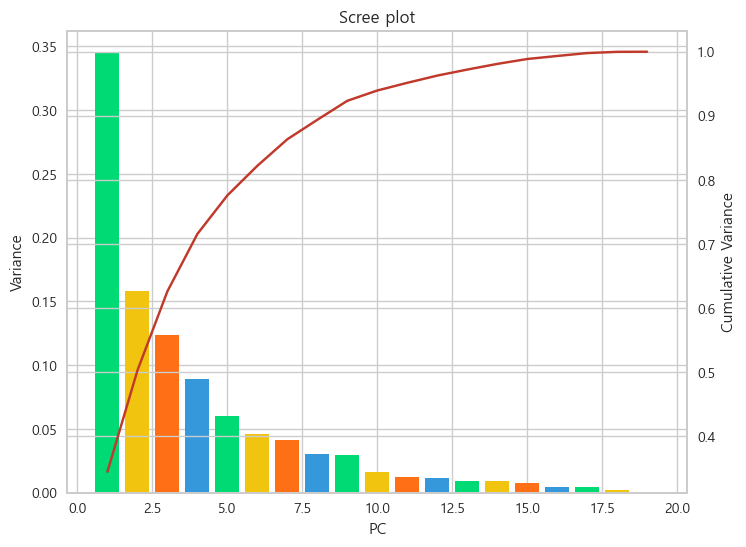

In [169]:
# Scree plot
n_feature = len(df_anal.columns)
pca_scree = PCA(n_components=n_feature)
pca_scree.fit(df_anal)
pc_arr = np.arange(pca_scree.n_components_)+1
vals = pca_scree.explained_variance_ratio_
cumvals = np.cumsum(vals)

fig, ax1 = plt.subplots(figsize=(8,6))
ax1.bar(pc_arr, vals, color = ['#00da75', '#f1c40f',  '#ff6f15', '#3498db'])
ax1.set_xlabel("PC")
ax1.set_ylabel("Variance")

ax1.set_title("Scree plot")

ax2 = ax1.twinx()
ax2.plot(pc_arr, cumvals, color = '#c0392b')
ax2.set_ylabel("Cumulative Variance")

plt.show()

# variance는 각 주성분(차원)이 데이터의 분산을 얼마나 잘 설명하는지를 나타냄
# 주성분의 추가가 분산 설명에 큰 기여를 하지 않게 되는 'elbow'지점까지의 주성분들만 선택하는 것이 좋음
# 아래 그래프에서의 경우 첫번째 주성분은 전체 분산의 34% 정도를 설명하고 있음
# 주성분별 variance를 합했을 때 90% 정도가 되는 지점이 앞에서 언급한 'elbow' 지점임

### elbow plot

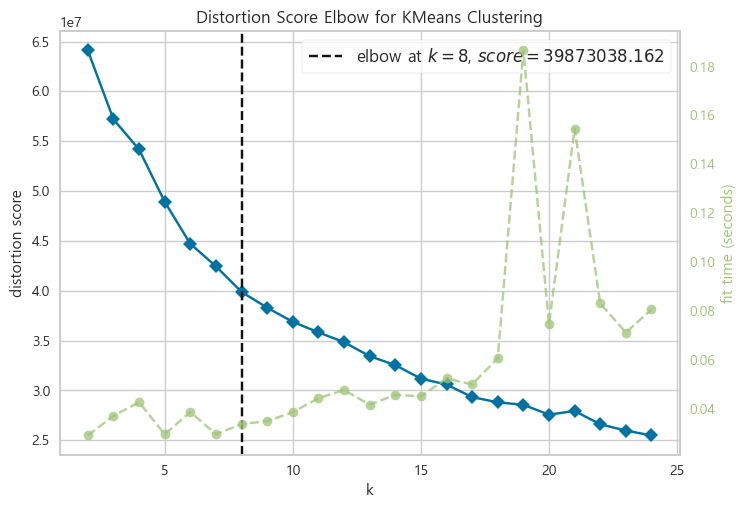

KElbowVisualizer(ax=<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>,
                 estimator=KMeans(n_clusters=24, random_state=0), k=(2, 25))

In [78]:
# for 군집 개수 확인
kelbow_visualizer(KMeans(random_state=0), df_anal, k=(2,25))

### 실루엣 계수

In [7]:
k_list = []
silhouette_list = []

for i in range(2, 20):
    kmeans=KMeans(n_clusters=i, random_state=0).fit(df_anal)
    silhouette_avg = silhouette_score(df_anal, kmeans.labels_)
    k_list.append(i)
    silhouette_list.append(silhouette_avg)
    print(f"k = {i} → silhouette index {silhouette_avg}")

k = 2 → silhouette index 0.34500336024071093
k = 3 → silhouette index 0.3527550170548417
k = 4 → silhouette index 0.2805815062636127
k = 5 → silhouette index 0.31686029811782584
k = 6 → silhouette index 0.35210444909392125
k = 7 → silhouette index 0.3689375010014238
k = 8 → silhouette index 0.3875398801827526
k = 9 → silhouette index 0.39985808675513707
k = 10 → silhouette index 0.41175531644050206
k = 11 → silhouette index 0.4184475755292582
k = 12 → silhouette index 0.4269548732744591
k = 13 → silhouette index 0.4339800132285572
k = 14 → silhouette index 0.44465455447243935
k = 15 → silhouette index 0.45883163291361795
k = 16 → silhouette index 0.4628453996130611
k = 17 → silhouette index 0.47696385919601225
k = 18 → silhouette index 0.4831756844494553
k = 19 → silhouette index 0.48659100668965577


In [14]:
silhouette_dic = { k : silhouette for k, silhouette in zip(k_list, silhouette_list)}
silhouette_df = pd.DataFrame(silhouette_dic, index=[0])
silhouette_df

,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.345003,0.352755,0.280582,0.31686,0.352104,0.368938,0.38754,0.399858,0.411755,0.418448,0.426955,0.43398,0.444655,0.458832,0.462845,0.476964,0.483176,0.486591


In [23]:
silhouette_df = silhouette_df.transpose().reset_index().rename(columns={'index' : 'k', 0 : 'silhouette'})

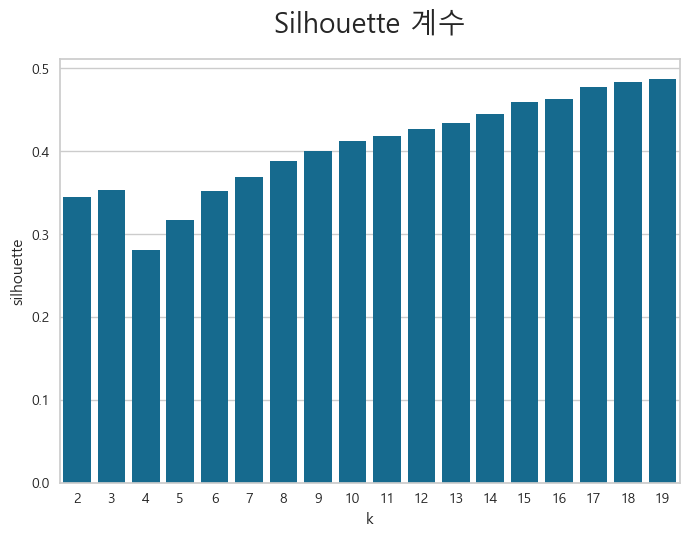

In [26]:
sns.barplot(data=silhouette_df, x='k', y='silhouette')
plt.title('Silhouette 계수', fontsize=20, pad=20)
plt.show()

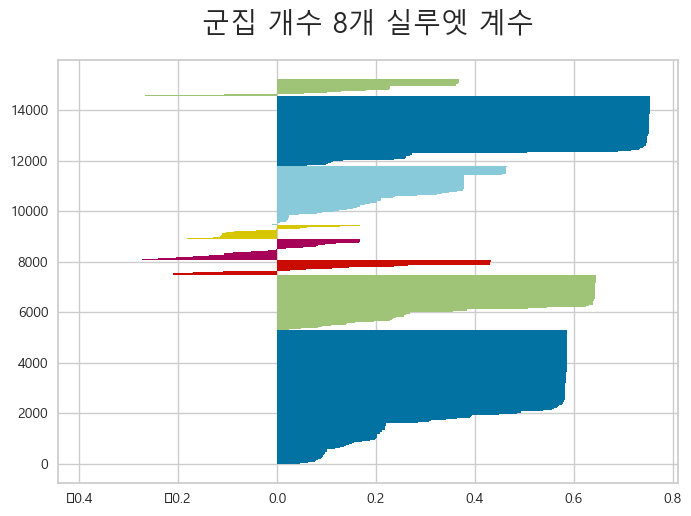

In [30]:
k = 8

fig, ax = plt.subplots(1,1)
kmeans = KMeans(n_clusters = k, random_state=0).fit(df_anal)
silhouette_vals = silhouette_samples(df_anal, kmeans.labels_)
y_ticks = []
y_lower = y_upper = 0

for c_num in np.unique(kmeans.labels_):
    cluster_silhouette_vals = silhouette_vals[kmeans.labels_==c_num]
    y_upper += len(cluster_silhouette_vals)
    cluster_silhouette_vals.sort()

    plt.title(f'군집 개수 {k}개 실루엣 계수', fontsize=20, pad=20)
    ax.barh(range(y_lower, y_upper), cluster_silhouette_vals, height=1)
    y_lower += len(cluster_silhouette_vals)

### PCA

In [167]:
pca = PCA(n_components=8)
df_anal_pca = pd.DataFrame(data = pca.fit_transform(df_anal), columns = ['pc1', 'pc2', 'pc3', 'pc4', 'pc5', 'pc6', 'pc7', 'pc8'])
# k-means로 넘어가기

In [43]:
# 차원별 분산보존율
column = []
sum = 0

for a in range(2, 20):
   for b in range(a):
	   column.append(f'pc{b}')
   pca = PCA(n_components=a)
   df_anal_pca = pd.DataFrame(data = pca.fit_transform(df_anal), columns = column)
   column = []

   for c in range(len(pca.explained_variance_ratio_)):
      sum+=pca.explained_variance_ratio_[c]
   print(f'{a}차원의 분산 보존율은 {sum}입니다.')
   sum = 0

2차원의 분산 보존율은 0.5029423754764534입니다.
3차원의 분산 보존율은 0.6264242267708784입니다.
4차원의 분산 보존율은 0.7158268506560757입니다.
5차원의 분산 보존율은 0.775927969202927입니다.
6차원의 분산 보존율은 0.8221131113359182입니다.
7차원의 분산 보존율은 0.8635041877715418입니다.
8차원의 분산 보존율은 0.8938414980090121입니다.
9차원의 분산 보존율은 0.9234708519704884입니다.
10차원의 분산 보존율은 0.9395178325765281입니다.
11차원의 분산 보존율은 0.951504696553558입니다.
12차원의 분산 보존율은 0.9627659100637509입니다.
13차원의 분산 보존율은 0.9721439706748989입니다.
14차원의 분산 보존율은 0.9809840292138603입니다.
15차원의 분산 보존율은 0.9886309554417166입니다.
16차원의 분산 보존율은 0.9933598497057292입니다.
17차원의 분산 보존율은 0.9978938706403783입니다.
18차원의 분산 보존율은 0.9998369166563554입니다.
19차원의 분산 보존율은 0.9999999999999998입니다.


In [20]:
# 분산보존율
pca.explained_variance_ratio_

array([0.34506827, 0.15787411, 0.12348185, 0.08940262, 0.06010112,
       0.04618514, 0.04139108, 0.03033731])

In [102]:
# 로딩값(각 주성분에 대한 변수들의 기여도를 나타냄)
# 주성분과 feature간의 관계 확인
pca_com = pca.components_
pca_comdf = pd.DataFrame(pca_com, columns = df_anal.columns, index=[f'pc{idx+1}' for idx in range(pca_com.shape[0])])
pca_comdf

,Review_score,bread,beverage,view,atmosphere,friendly,clean_store,restroom_clean,parking,spacious_store,plenty_seats,comfortable_seats,special_menu,photo,good_music,reservation_possible,beautiful_interior,price,wait
pc1,-0.003315,-0.984306,-0.022538,0.015489,-0.033591,-0.148179,-0.062172,-0.014984,-0.002772,-0.017489,-0.011443,-0.005351,-0.001890,-0.003119,0.000384,-0.003708,-0.003303,-0.049773,-0.014809
pc2,-0.004221,0.100693,-0.818385,-0.069671,-0.374022,-0.365414,-0.128362,-0.038773,-0.005848,-0.067727,-0.043701,-0.037638,-0.003659,-0.021534,-0.014349,-0.001629,-0.093200,-0.079039,-0.016380
pc3,0.002547,-0.125014,-0.523498,0.033163,0.269731,0.785944,0.117251,0.033975,-0.000486,0.030560,0.019856,0.024006,0.004082,0.011638,0.006229,0.008174,0.036557,0.016563,0.008794
pc4,-0.002094,0.042795,-0.218344,0.145807,0.816397,-0.451499,0.084108,0.023835,0.002961,0.091086,0.034922,0.043110,0.004313,0.031769,0.020898,-0.009075,0.179052,-0.079011,-0.000011
pc5,-0.002000,0.037959,0.076905,-0.027951,-0.018336,0.092095,-0.039763,-0.003782,-0.009012,-0.012055,-0.005356,-0.001589,-0.000153,0.000848,0.000049,-0.000267,0.013187,-0.989900,-0.033352
pc6,-0.000126,-0.023403,-0.036588,-0.075831,-0.210900,-0.051347,0.281311,0.076151,0.033083,0.839049,0.304168,0.183438,0.004402,0.016312,0.003640,0.001800,0.167542,-0.024559,0.008473
pc7,0.001323,0.000590,-0.016467,-0.042620,-0.178250,0.006625,0.081199,0.015298,-0.000327,-0.230450,-0.072376,-0.046497,0.009825,0.039855,-0.004088,0.000578,0.946929,0.016800,-0.009964
pc8,-0.001826,0.037342,0.010763,0.352075,0.018333,0.104243,-0.841018,-0.197866,0.015971,0.286995,0.049566,0.028703,-0.010021,0.014322,0.011158,0.004303,0.167656,0.035655,-0.033681
pc9,0.000987,0.006973,-0.014112,0.915920,-0.202396,-0.023486,0.316776,0.093185,0.002529,-0.080297,0.002257,0.009583,0.004802,0.009651,0.009556,-0.001497,-0.044147,-0.038238,0.011162


In [103]:
# 차원 정체성 확인 작업
feature_pca = pca_comdf.transpose().sort_values('pc1', ascending=False)
feature_pca

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9
view,0.015489,-0.069671,0.033163,0.145807,-0.027951,-0.075831,-0.042620,0.352075,0.915920
good_music,0.000384,-0.014349,0.006229,0.020898,0.000049,0.003640,-0.004088,0.011158,0.009556
special_menu,-0.001890,-0.003659,0.004082,0.004313,-0.000153,0.004402,0.009825,-0.010021,0.004802
parking,-0.002772,-0.005848,-0.000486,0.002961,-0.009012,0.033083,-0.000327,0.015971,0.002529
photo,-0.003119,-0.021534,0.011638,0.031769,0.000848,0.016312,0.039855,0.014322,0.009651
beautiful_interior,-0.003303,-0.093200,0.036557,0.179052,0.013187,0.167542,0.946929,0.167656,-0.044147
Review_score,-0.003315,-0.004221,0.002547,-0.002094,-0.002000,-0.000126,0.001323,-0.001826,0.000987
reservation_possible,-0.003708,-0.001629,0.008174,-0.009075,-0.000267,0.001800,0.000578,0.004303,-0.001497
comfortable_seats,-0.005351,-0.037638,0.024006,0.043110,-0.001589,0.183438,-0.046497,0.028703,0.009583
plenty_seats,-0.011443,-0.043701,0.019856,0.034922,-0.005356,0.304168,-0.072376,0.049566,0.002257


In [104]:
feature_pca.reset_index(inplace=True)
feature_pca.rename(columns={'index' : 'feature'}, inplace=True)
feature_pca

,feature,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9
0,view,0.015489,-0.069671,0.033163,0.145807,-0.027951,-0.075831,-0.042620,0.352075,0.915920
1,good_music,0.000384,-0.014349,0.006229,0.020898,0.000049,0.003640,-0.004088,0.011158,0.009556
2,special_menu,-0.001890,-0.003659,0.004082,0.004313,-0.000153,0.004402,0.009825,-0.010021,0.004802
3,parking,-0.002772,-0.005848,-0.000486,0.002961,-0.009012,0.033083,-0.000327,0.015971,0.002529
4,photo,-0.003119,-0.021534,0.011638,0.031769,0.000848,0.016312,0.039855,0.014322,0.009651
5,beautiful_interior,-0.003303,-0.093200,0.036557,0.179052,0.013187,0.167542,0.946929,0.167656,-0.044147
6,Review_score,-0.003315,-0.004221,0.002547,-0.002094,-0.002000,-0.000126,0.001323,-0.001826,0.000987
7,reservation_possible,-0.003708,-0.001629,0.008174,-0.009075,-0.000267,0.001800,0.000578,0.004303,-0.001497
8,comfortable_seats,-0.005351,-0.037638,0.024006,0.043110,-0.001589,0.183438,-0.046497,0.028703,0.009583
9,plenty_seats,-0.011443,-0.043701,0.019856,0.034922,-0.005356,0.304168,-0.072376,0.049566,0.002257


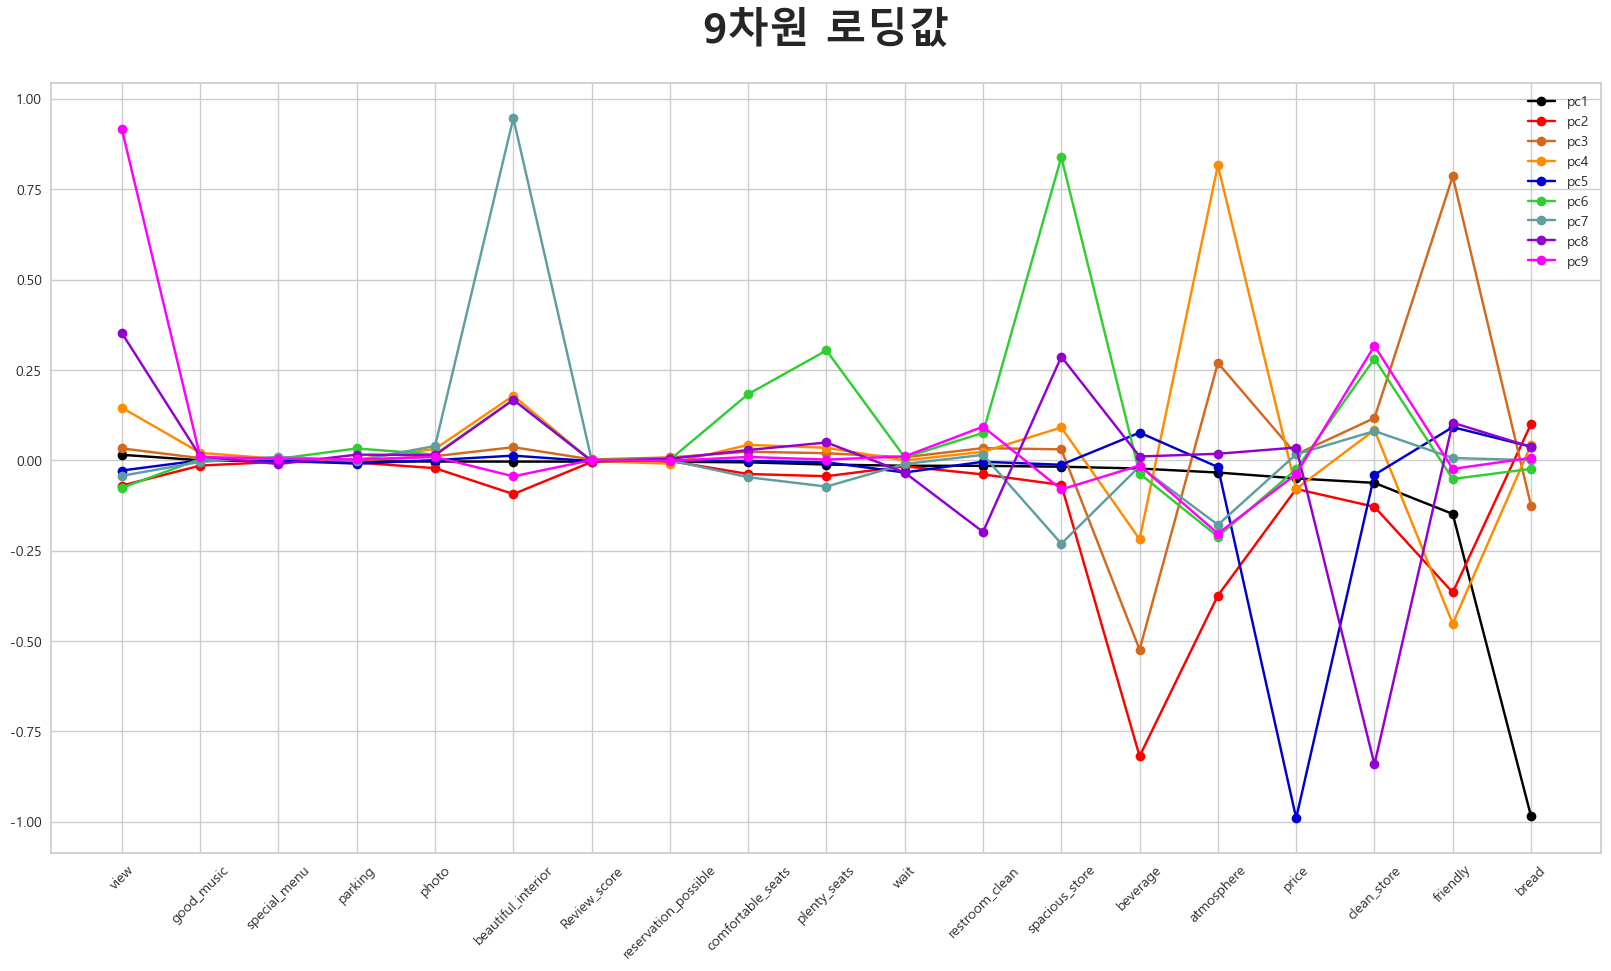

In [111]:
plt.figure(figsize=(20,10))
plt.plot(feature_pca['feature'], feature_pca['pc1'], marker = 'o', label='pc1', color = 'black')
plt.plot(feature_pca['feature'], feature_pca['pc2'], marker = 'o', label='pc2', color = 'red')
plt.plot(feature_pca['feature'], feature_pca['pc3'], marker = 'o', label='pc3', color = 'chocolate')
plt.plot(feature_pca['feature'], feature_pca['pc4'], marker = 'o', label='pc4', color = 'darkorange')
plt.plot(feature_pca['feature'], feature_pca['pc5'], marker = 'o', label='pc5', color = 'mediumblue')
plt.plot(feature_pca['feature'], feature_pca['pc6'], marker = 'o', label='pc6', color = 'limegreen')
plt.plot(feature_pca['feature'], feature_pca['pc7'], marker = 'o', label='pc7', color = 'cadetblue')
plt.plot(feature_pca['feature'], feature_pca['pc8'], marker = 'o', label='pc8', color = 'darkviolet')
plt.plot(feature_pca['feature'], feature_pca['pc9'], marker = 'o', label='pc9', color = 'fuchsia')

plt.title(f'{len(pca_com)}차원 로딩값', fontsize=30, fontweight='bold', pad=30)
plt.xticks(rotation=45)
plt.legend()
plt.show()

### K-Means

In [218]:
kmeans = KMeans(n_clusters=7, random_state=0).fit(df_anal_pca)

In [219]:
# for radar plot
df_centroids = pd.DataFrame(kmeans.cluster_centers_, columns = df_anal_pca.columns)
df_centroids

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8
0,36.962422,4.699191,2.065629,-3.506431,1.545754,0.651198,-2.231375,-1.272883
1,-64.783261,17.076618,-1.239020,-2.460916,2.357184,-0.962584,-1.255936,1.101737
2,-16.421259,-50.785405,-37.557764,-18.946829,4.724299,0.115767,-2.171388,0.417602
3,-12.219053,-52.185187,28.981406,59.631999,0.105596,-7.246486,-10.333303,1.430331
4,2.173581,-1.098468,3.693213,-11.717944,-69.333298,-1.571137,-0.004506,1.306455
5,15.755130,-16.336411,3.245509,16.966344,1.441733,11.083684,59.309536,9.256201
6,-15.554604,15.579400,2.641443,-1.626642,2.824196,-0.408066,-1.506486,-1.120900


In [148]:
# for 군집 정체성 파악 1
df_centroids = df_centroids.transpose()
df_centroids.reset_index(inplace=True)
df_centroids.rename(columns={'index' : 'pc'}, inplace=True)
df_centroids

,pc,0,1,2,3,4,5,6,7
0,pc1,38.033674,-63.477205,-62.992657,23.413846,-15.049357,20.652197,-15.484511,-36.358649
1,pc2,13.544486,21.724963,-52.342265,-38.001845,16.981667,-28.584922,-51.908401,-18.846881
2,pc3,4.420611,-7.285678,-44.276228,-23.075697,-1.940318,13.804955,30.514822,64.857496
3,pc4,-0.521364,2.021066,-16.929291,-12.226088,0.776649,39.083381,61.395397,-40.343347
4,pc5,-0.970396,-0.131722,5.978830,0.910512,-0.607574,-4.282576,0.141661,4.784620
5,pc6,1.763956,-0.336927,3.016374,-0.604063,0.125899,-10.581494,-4.896230,-3.813835
6,pc7,0.576755,-0.008063,0.717898,0.669580,-0.380458,-7.146382,-3.771389,1.050196
7,pc8,-1.494000,0.708891,1.968847,-0.902969,-1.301228,30.376180,-3.044171,5.146441
8,pc9,-1.048151,0.283913,0.048076,-1.541440,-0.306986,70.465038,-14.209874,-1.204788


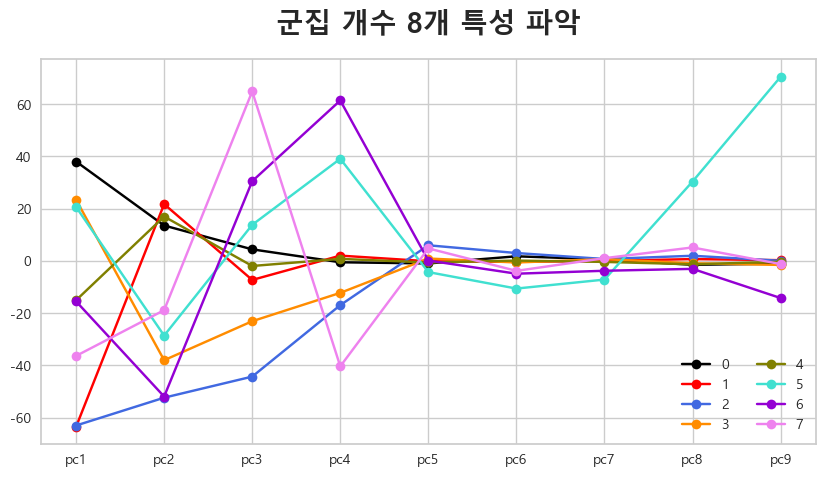

In [159]:
# for 군집 정체성 파악 2
plt.figure(figsize=(10,5))

plt.plot(df_centroids['pc'], df_centroids[0], marker = 'o', label='0', color = 'black')
plt.plot(df_centroids['pc'], df_centroids[1], marker = 'o', label='1', color = 'red')
plt.plot(df_centroids['pc'], df_centroids[2], marker = 'o', label='2', color = 'royalblue')
plt.plot(df_centroids['pc'], df_centroids[3], marker = 'o', label='3', color = 'darkorange')
plt.plot(df_centroids['pc'], df_centroids[4], marker = 'o', label='4', color = 'olive')
plt.plot(df_centroids['pc'], df_centroids[5], marker = 'o', label='5', color = 'turquoise')
plt.plot(df_centroids['pc'], df_centroids[6], marker = 'o', label='6', color = 'darkviolet')
plt.plot(df_centroids['pc'], df_centroids[7], marker = 'o', label='7', color = 'violet')


plt.title(f'군집 개수 {len(kmeans.cluster_centers_)}개 특성 파악', fontsize=20, fontweight='bold', pad=20)
plt.legend(ncols=2, loc='lower right')
plt.show()

### Scatter plot

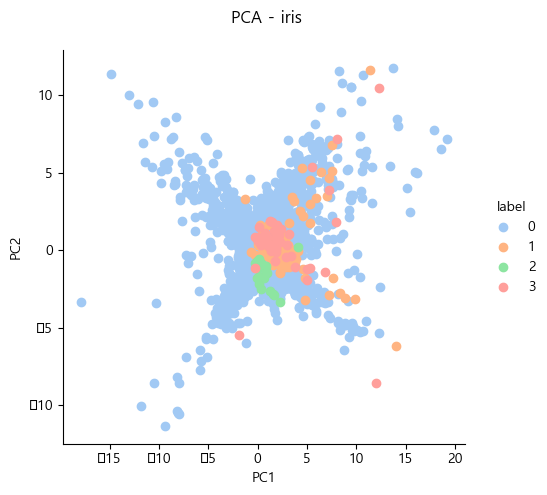

In [23]:
# PCA 시각화 with Seaborn
g = sns.FacetGrid(df_anal_pca, hue="label", height = 5, margin_titles = True, # margin_title은 제목 표시여부를 적는 곳
                 palette = sns.color_palette("pastel", 4))
g.map_dataframe(plt.scatter, "pc1", "pc2")
g.add_legend() # hue의 결과를 찍기위해
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle("PCA - iris")
g.set_xlabels("PC1")
g.set_ylabels("PC2")

### T-SNE

In [12]:
tsne = TSNE(n_components=2) # 차원의 개수

df_anal_tsne = pd.DataFrame(data = tsne.fit_transform(df_anal), columns = ['col1', 'col2'])
df_anal_tsne['label']=kmeans.labels_

In [ ]:
#t-sne 시각화
g = sns.FacetGrid(df_anal_tsne, hue="label", height = 8, margin_titles = True,
                  palette = sns.color_palette())
g.map_dataframe(plt.scatter, "col1", "col2")
g.add_legend()
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle("t-sne - digits")
g.set_xlabels("X")
g.set_ylabels("Y")

### Radar plot

In [ ]:
size_df = pd.DataFrame({'index' : [0,1,2,3,4,5,6,7]})

In [182]:
size_df['8pc_6k'] = df_centroids['size']
size_df

,index,9pc_6k,9pc_7k,9pc_8k,8pc_8k,8pc_7k,8pc_6k
0,0,7040.0,6482.0,5788,5550,6881.0,6999.0
1,1,2909.0,2909.0,2802,2798,3097.0,3243.0
2,2,2189.0,2182.0,511,961,1211.0,3036.0
3,3,1091.0,1091.0,2249,825,898.0,899.0
4,4,696.0,694.0,2091,669,441.0,457.0
5,5,1302.0,1301.0,303,2186,579.0,593.0
6,6,NaN,568.0,785,1890,2120.0,NaN
7,7,NaN,NaN,698,348,NaN,NaN


In [183]:
size_df = size_df[['8pc_6k', '8pc_7k', '8pc_8k', '9pc_6k', '9pc_7k', '9pc_8k']]

In [220]:
size_df_transpose

,0,1,2,3,4,5,6,7
8pc_6k,6999.0,3243.0,3036.0,899.0,457.0,593.0,NaN,NaN
8pc_7k,6881.0,3097.0,1211.0,898.0,441.0,579.0,2120.0,NaN
8pc_8k,5550.0,2798.0,961.0,825.0,669.0,2186.0,1890.0,348.0
9pc_6k,7040.0,2909.0,2189.0,1091.0,696.0,1302.0,NaN,NaN
9pc_7k,6482.0,2909.0,2182.0,1091.0,694.0,1301.0,568.0,NaN
9pc_8k,5788.0,2802.0,511.0,2249.0,2091.0,303.0,785.0,698.0


In [252]:
size_df_transpose.iloc[5,0:8]

0    5788.0
1    2802.0
2     511.0
3    2249.0
4    2091.0
5     303.0
6     785.0
7     698.0
Name: 9pc_8k, dtype: float64

In [202]:
size_df_transpose = size_df.transpose()

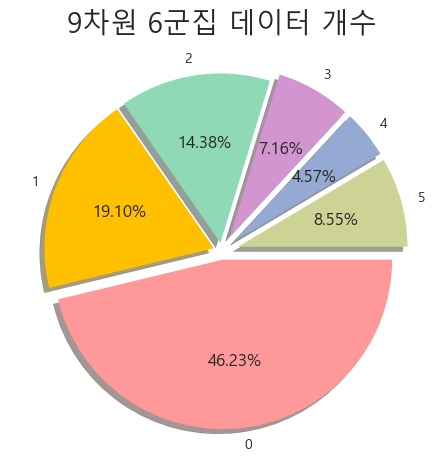

In [261]:
labels = [0,1,2,3,4,5]
explode = [0.05, 0.05, 0.05, 0.1, 0.1, 0.1]
colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0', '#95aad3', '#cdd395']
#d3ac95
#95d3c9
plt.title("9차원 6군집 데이터 개수", fontsize=20)
plt.pie(size_df_transpose.iloc[3,0:6], labels=labels, autopct='%.2f%%', counterclock=False, shadow=True, explode=explode, colors=colors)
plt.show()

In [180]:
from collections import Counter

c = Counter()
c.update(kmeans.labels_) # kmeans.labels_에 있는 레이블의 등장 횟수를 c에 추가함(딕셔너리 형태)
c

Counter({0: 6999, 1: 3243, 2: 3036, 3: 899, 5: 593, 4: 457})

In [181]:
label_counts = [c[x] for x in df_centroids.index]
df_centroids['size'] = label_counts
df_centroids

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,size
0,36.563654,4.691213,1.936795,-3.519362,1.566477,0.635201,-2.204355,-1.256137,6999
1,-63.297875,17.411412,-1.094842,-2.162261,2.619192,-0.796499,-1.224390,0.964211,3243
2,-15.804467,-9.958762,-12.792673,-8.562420,3.648580,-0.535836,-2.280508,-0.641955,3036
3,-11.776850,-52.105919,29.401536,59.439676,-0.091606,-6.783869,-10.525395,1.277117,899
4,0.608320,-3.010150,3.262031,-12.551196,-69.099135,-1.885690,0.332933,1.388336,457
5,12.913566,-18.288952,1.535871,16.761158,1.898412,11.339847,60.089008,9.833294,593


In [165]:
import plotly.graph_objects as go

def plot_radar_from_centroid(df_centroids):
    df_centroids = df_centroids.drop('size', axis=1)
    fig = go.Figure()
    categories = df_centroids.columns
    for row in df_centroids.iterrows():
        fig.add_trace(go.Scatterpolar(
            r=row[1].tolist(),
            theta=categories,
            fill='toself',
            name='cluster {}'.format(row[0])
        ))

    fig.update_layout(
        autosize=False,
        width=1000,
        height=800,
    )
    fig.show()

plot_radar_from_centroid(df_centroids)

### Store group 후 labeling

In [36]:
# new_df = df.pivot_table(index='Store', values = ['Review_score', 'Review_counts', 'bread', 'beverage', 'vegan', 'no_senior', 'no_kids',\
#                                             'pet', 'whole_wheat', 'view', 'atmosphere', 'friendly', 'restroom_clean', 'parking', 'spacious_store', 'plenty_seats',\
#                                                 'comfortable_seats', 'special_menu', 'photo', 'good_music', 'reservation_possible', 'unique_concept', 'beautiful_interior',\
#                                                     'price', 'wait', 'health', 'sentiment'],
#                                         aggfunc='mean').reset_index()
# new_df

,Store,Review_counts,Review_score,atmosphere,beautiful_interior,beverage,bread,comfortable_seats,friendly,good_music,health,no_kids,no_senior,parking,pet,photo,plenty_seats,price,reservation_possible,restroom_clean,sentiment,spacious_store,special_menu,unique_concept,vegan,view,wait,whole_wheat
0,5센소커피충무로점,334.000000,4.30,3.678161,1.149425,32.758621,5.287356,-0.344828,0.804598,0.000000,0.000000,0.000000,0.0,0.000000,0.0,-0.574713,1.149425,17.126437,0.0,-3.448276,0.896552,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
1,79파운야드을지로3가점,1000.000000,4.30,6.976744,15.813953,12.674419,30.581395,-1.627907,1.860465,0.581395,0.000000,0.000000,0.0,0.000000,0.0,0.116279,0.000000,-2.093023,0.0,-0.581395,0.895349,-0.581395,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
2,AboutBagel,385.000000,4.30,9.724771,4.128440,12.385321,76.330275,1.376147,17.431193,1.009174,0.000000,0.917431,0.0,0.000000,0.0,3.211009,5.779817,0.825688,0.0,0.458716,1.000000,10.825688,1.073394,0.091743,0.000000,0.0,0.000000,0.000000
3,Cre8,589.000000,4.30,4.210526,4.385965,10.000000,3.508772,1.754386,-5.087719,0.000000,0.877193,0.000000,0.0,6.491228,0.0,0.000000,0.000000,-2.631579,0.0,0.000000,0.807018,3.508772,0.000000,0.000000,0.877193,0.0,0.000000,0.000000
4,ERICKAYSER,190.000000,4.42,2.564103,0.000000,2.564103,54.615385,0.000000,3.846154,0.000000,0.000000,0.000000,0.0,2.564103,0.0,2.564103,0.000000,-4.615385,0.0,0.000000,0.974359,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,홍밀밀,596.000000,4.40,0.786517,0.000000,18.539326,4.831461,1.123596,18.651685,0.000000,0.561798,0.000000,0.0,0.000000,0.0,-0.561798,0.000000,-1.573034,0.0,0.000000,0.955056,-1.685393,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
204,화미가신세계백화점본점,6.000000,4.40,0.000000,0.000000,0.000000,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
205,화수분,61.000000,3.80,-5.500000,-1.250000,3.750000,38.000000,0.000000,-8.250000,0.000000,5.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,-1.250000,0.0,0.000000,0.725000,0.250000,0.000000,0.000000,0.000000,0.0,-2.500000,0.000000
206,화수분약수본점,1669.555556,2.60,-2.685185,0.000000,0.925926,37.592593,0.138889,-14.444444,0.000000,1.388889,-0.462963,0.0,0.925926,0.0,0.000000,0.138889,-4.259259,0.0,-0.925926,0.759259,0.000000,0.000000,0.000000,0.000000,0.0,-1.851852,2.407407


In [15]:
df_anal['cluster'] = kmeans.labels_
df_anal['Store'] = df_ver3_info['Store']
df_anal

,Review_score,bread,beverage,view,atmosphere,friendly,clean_store,restroom_clean,parking,spacious_store,plenty_seats,comfortable_seats,special_menu,photo,good_music,reservation_possible,beautiful_interior,price,wait,cluster,Store
0,-0.041896,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5센소커피충무로점
1,-0.041896,10.0,100.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,5센소커피충무로점
2,-0.041896,0.0,-50.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5센소커피충무로점
3,-0.041896,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5센소커피충무로점
4,-0.041896,10.0,0.0,0,0,0,100,0,0,0,0,0,0,0,0,0,100,100,0,4,5센소커피충무로점
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15222,0.266992,50.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,황소쿠키
15223,0.266992,100.0,100.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,황소쿠키
15224,0.266992,50.0,0.0,0,0,50,0,0,0,0,0,0,0,0,0,0,0,50,0,4,황소쿠키
15225,0.266992,50.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,황소쿠키


In [30]:
store_cluster = df_anal.groupby(['Store', 'cluster'])['Store'].count()
store_cluster = store_cluster.reset_index(name='Count')
store_cluster

,Store,cluster,Count
0,5센소커피충무로점,0,48
1,5센소커피충무로점,1,1
2,5센소커피충무로점,2,15
3,5센소커피충무로점,3,4
4,5센소커피충무로점,4,19
...,...,...,...
871,화수분약수본점,4,6
872,황소쿠키,0,17
873,황소쿠키,1,6
874,황소쿠키,2,5


In [31]:
# 1순위만 뽑아내기
store_cluster_sorted = store_cluster.sort_values(by=['Store', 'Count'], ascending=[True, False])
store_cluster_sorted_cluster = store_cluster_sorted.drop_duplicates(subset=['Store'])
store_cluster_sorted_cluster

,Store,cluster,Count
0,5센소커피충무로점,0,48
5,79파운야드을지로3가점,0,27
11,AboutBagel,1,48
16,Cre8,0,49
23,ERICKAYSER,1,14
...,...,...,...
857,홍밀밀,0,79
862,화미가신세계백화점본점,1,1
863,화수분,0,19
867,화수분약수본점,0,46


In [86]:
# 1, 2순위 뽑아내기
test_sorted = test.sort_values(by=['Store', 'Count'], ascending=[True, False])
test_top2 = test_sorted.groupby('Store').head(2)
test_top2

,Store,cluster,Count
3,5센소커피충무로점,3,42
0,5센소커피충무로점,0,38
6,79파운야드을지로3가점,0,30
9,79파운야드을지로3가점,3,22
13,AboutBagel,1,54
...,...,...,...
884,화수분,1,15
889,화수분약수본점,1,45
888,화수분약수본점,0,28
894,황소쿠키,0,17


#### cluster labeling

In [19]:
df_anal['cluster_labeling'] = df_anal['cluster']

In [24]:
df_anal.loc[df_anal['cluster']==0, 'cluster_labeling'] = '빵 맛이 좀 그래요...'
df_anal.loc[df_anal['cluster']==1, 'cluster_labeling'] = '빵이 맛있어요!'
df_anal.loc[df_anal['cluster']==2, 'cluster_labeling'] = '가성비 맛집이에요!'
df_anal.loc[df_anal['cluster']==3, 'cluster_labeling'] = '불친절하긴하지만 풍경 좋고 분위기도 좋아요!'
df_anal.loc[df_anal['cluster']==4, 'cluster_labeling'] = '비싸지만 값어치 한답니다!'
df_anal.loc[df_anal['cluster']==5, 'cluster_labeling'] = '가게가 이뻐요!'

##### streamlit 데이터셋 1(최빈값)

In [28]:
mode_df = df_anal[['Store', 'cluster', 'cluster_labeling']]

In [29]:
mode_df

,Store,cluster,cluster_labeling
0,5센소커피충무로점,0,빵 맛이 좀 그래요...
1,5센소커피충무로점,2,가성비 맛집이에요!
2,5센소커피충무로점,0,빵 맛이 좀 그래요...
3,5센소커피충무로점,0,빵 맛이 좀 그래요...
4,5센소커피충무로점,4,비싸지만 값어치 한답니다!
...,...,...,...
15222,황소쿠키,2,가성비 맛집이에요!
15223,황소쿠키,2,가성비 맛집이에요!
15224,황소쿠키,4,비싸지만 값어치 한답니다!
15225,황소쿠키,2,가성비 맛집이에요!


In [32]:
store_cluster_sorted_cluster

,Store,cluster,Count
0,5센소커피충무로점,0,48
5,79파운야드을지로3가점,0,27
11,AboutBagel,1,48
16,Cre8,0,49
23,ERICKAYSER,1,14
...,...,...,...
857,홍밀밀,0,79
862,화미가신세계백화점본점,1,1
863,화수분,0,19
867,화수분약수본점,0,46


In [37]:
streamlit_mode = pd.merge(store_cluster_sorted_cluster, mode_df, how='inner', on=['Store', 'cluster'])
streamlit_mode

,Store,cluster,Count,cluster_labeling
0,5센소커피충무로점,0,48,빵 맛이 좀 그래요...
1,5센소커피충무로점,0,48,빵 맛이 좀 그래요...
2,5센소커피충무로점,0,48,빵 맛이 좀 그래요...
3,5센소커피충무로점,0,48,빵 맛이 좀 그래요...
4,5센소커피충무로점,0,48,빵 맛이 좀 그래요...
...,...,...,...,...
7735,황소쿠키,0,17,빵 맛이 좀 그래요...
7736,황소쿠키,0,17,빵 맛이 좀 그래요...
7737,황소쿠키,0,17,빵 맛이 좀 그래요...
7738,황소쿠키,0,17,빵 맛이 좀 그래요...


In [43]:
streamlit_mode_fin = streamlit_mode.drop_duplicates(subset=['Store'])
streamlit_mode_fin.drop('Count', axis=1, inplace=True)
streamlit_mode_fin.reset_index(drop=True, inplace=True)
streamlit_mode_fin

,Store,cluster,cluster_labeling
0,5센소커피충무로점,0,빵 맛이 좀 그래요...
1,79파운야드을지로3가점,0,빵 맛이 좀 그래요...
2,AboutBagel,1,빵이 맛있어요!
3,Cre8,0,빵 맛이 좀 그래요...
4,ERICKAYSER,1,빵이 맛있어요!
...,...,...,...
203,홍밀밀,0,빵 맛이 좀 그래요...
204,화미가신세계백화점본점,1,빵이 맛있어요!
205,화수분,0,빵 맛이 좀 그래요...
206,화수분약수본점,0,빵 맛이 좀 그래요...


In [44]:
streamlit_mode_fin.to_csv('streamlit_mode.csv', encoding='utf-8-sig')

##### streamlit 데이터셋 2(리뷰 텍스트)(2번 슬라이드에서 3번 슬라이드 넘어갈 때 필요)

In [45]:
with_slope = pd.read_csv('N:/개인/DA/내배캠/5. 최종 프로젝트/slope/final/total_unique_slope.csv', encoding='cp949')
with_slope

,Platform,Number,Store,Address,X,Y,표준신주소,표준구주소,행정동명,법정동명,경사도
0,naver,1,10월21일,서울 은평구 연서로11길 5 DH팰리스 1층,126.914768,37.607979,서울특별시 은평구 연서로11길 5,서울특별시 은평구 구산동 21-41,구산동,구산동,2.13505
1,naver,2,1209,서울 강남구 언주로 709 1층 CAFE_1209,127.034912,37.516793,서울특별시 강남구 언주로 709,서울특별시 강남구 논현동 84,논현2동,논현동,2.63486
2,naver,3,1994양과점,서울 서대문구 연희맛로 3-4 계단 위 3층 (옥상),126.928303,37.566106,서울특별시 서대문구 연희맛로 3-4,서울특별시 서대문구 연희동 192-22,연희동,연희동,1.68751
3,naver,4,1인1잔,서울 은평구 연서로 534,126.937947,37.640970,서울특별시 은평구 연서로 534,서울특별시 은평구 진관동 2-1,진관동,진관동,6.62069
4,naver,5,21케이크,서울 강남구 언주로93길 32-7 1층,127.039073,37.503671,서울특별시 강남구 언주로93길 32-7,서울특별시 강남구 역삼동 672-28,역삼1동,역삼동,3.32143
...,...,...,...,...,...,...,...,...,...,...,...
1827,Kakao,1828,희카롱,서울 강남구 삼성로75길 42 (대치동),127.054727,37.502725,서울특별시 강남구 삼성로75길 42,서울특별시 강남구 대치동 901-13,대치4동,대치동,1.81755
1828,naver,1829,흰곰베이커리,서울 서대문구 통일로17길 16 오른쪽 103호,126.954438,37.577522,서울특별시 서대문구 통일로17길 16,서울특별시 서대문구 현저동 1-87,천연동,현저동,7.37107
1829,naver,1830,히비,서울 마포구 연남로11길 32 1층,126.917220,37.565428,서울특별시 마포구 연남로11길 32,서울특별시 마포구 연남동 487-213,연남동,연남동,0.00000
1830,naver,1831,히포케이크,서울 동대문구 장한로13길 11-6 1층,127.066916,37.566499,서울특별시 동대문구 장한로13길 11-6,서울특별시 동대문구 장안동 377-9,장안1동,장안동,0.00000


In [46]:
# 중구 데이터만 추출
with_slope = with_slope[with_slope['Address'].str.contains('중구')]

In [47]:
df_anal['Review_score_2'] = df_ver3_info['Review_score']

In [57]:
df_anal.drop('Review_score', axis=1, inplace=True)
df_anal.rename(columns={'Review_score_2' : 'Review_score'}, inplace=True)

In [65]:
df_anal['Review_text'] = df_ver3_info['Review_text']
df_anal['sentiment'] = df_ver3_info['sentiment']

In [66]:
df_anal_slope = pd.merge(df_anal, with_slope, how='left', on='Store')
df_anal_slope.head(1)

,bread,beverage,view,atmosphere,friendly,clean_store,restroom_clean,parking,spacious_store,plenty_seats,comfortable_seats,special_menu,photo,good_music,reservation_possible,beautiful_interior,price,wait,cluster,Store,cluster_labeling,Review_score,Review_text,sentiment,Platform,Number,Address,X,Y,표준신주소,표준구주소,행정동명,법정동명,경사도
0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5센소커피충무로점,빵 맛이 좀 그래요...,4.3,여름엔 아아지!!!,1,naver,10.0,서울 중구 퇴계로27길 35 1층,126.991228,37.562741,서울특별시 중구 퇴계로27길 35,서울특별시 중구 충무로3가 58-2,필동,충무로3가,0.0


In [67]:
# 필요 컬럼만 추출
df_anal_slope_fin = df_anal_slope[['Store', 'cluster', 'cluster_labeling', 'Review_text', 'Review_score', 'sentiment', 'Address', 'X', 'Y', '행정동명']]
df_anal_slope_fin

,Store,cluster,cluster_labeling,Review_text,Review_score,sentiment,Address,X,Y,행정동명
0,5센소커피충무로점,0,빵 맛이 좀 그래요...,여름엔 아아지!!!,4.3,1,서울 중구 퇴계로27길 35 1층,126.991228,37.562741,필동
1,5센소커피충무로점,2,가성비 맛집이에요!,커피 맛있었어요~! 키오스크 주문이라 편리하고 레몬쿠키도 촉촉하니 새콤달콤 했어요~!,4.3,1,서울 중구 퇴계로27길 35 1층,126.991228,37.562741,필동
2,5센소커피충무로점,0,빵 맛이 좀 그래요...,처음에는 라떼가. 맛있었는데ᆢ왜맛이 변한거죠???다시 원래대로 만들어주세요,4.3,0,서울 중구 퇴계로27길 35 1층,126.991228,37.562741,필동
3,5센소커피충무로점,0,빵 맛이 좀 그래요...,아메리카노 와인 아이스 테이크아웃.더위를 날려 주는 아아,4.3,1,서울 중구 퇴계로27길 35 1층,126.991228,37.562741,필동
4,5센소커피충무로점,4,비싸지만 값어치 한답니다!,매장이 고급스럽고 깔끔해요커피도 5가지중에 고를수 있고 가격도 저렴한데 맛은 진짜 ...,4.3,1,서울 중구 퇴계로27길 35 1층,126.991228,37.562741,필동
...,...,...,...,...,...,...,...,...,...,...
15222,황소쿠키,2,가성비 맛집이에요!,원재료가 좋아서 쿠키 맛이 좋아요종류도 다양하고 선물용으로 좋아요^^,4.4,1,서울 중구 서소문로 38 126호 황소쿠키,126.966234,37.560416,중림동
15223,황소쿠키,2,가성비 맛집이에요!,종류별로 다 ~~맛있어요!,4.4,1,서울 중구 서소문로 38 126호 황소쿠키,126.966234,37.560416,중림동
15224,황소쿠키,4,비싸지만 값어치 한답니다!,쿠키 너무 맛있고 크기대비 저렴한 편이고 사장님도 친절하시고 자주 방문하는 곳이에요!,4.4,1,서울 중구 서소문로 38 126호 황소쿠키,126.966234,37.560416,중림동
15225,황소쿠키,2,가성비 맛집이에요!,사장님 자매가 함께 운영한다는 유기농쿠키집이랍니다. 재료가 큼직하고 진하기가 ......,4.4,1,서울 중구 서소문로 38 126호 황소쿠키,126.966234,37.560416,중림동


In [75]:
df_anal_slope_fin.isna().sum()

Store               0
cluster             0
cluster_labeling    0
Review_text         0
Review_score        0
sentiment           0
Address             0
X                   0
Y                   0
행정동명                0
dtype: int64

In [71]:
# 결측치 처리(행정동)
df_anal_slope_fin.loc[df_anal_slope_fin['Store']=='그라츠과자점', '행정동명'] = df_anal_slope_fin.loc[df_anal_slope_fin['Store']=='그라츠과자점', '행정동명'].fillna('을지로동')
df_anal_slope_fin.loc[df_anal_slope_fin['Store']=='델리델리', '행정동명'] = df_anal_slope_fin.loc[df_anal_slope_fin['Store']=='델리델리', '행정동명'].fillna('명동')
df_anal_slope_fin.loc[df_anal_slope_fin['Store']=='라운디드', '행정동명'] = df_anal_slope_fin.loc[df_anal_slope_fin['Store']=='라운디드', '행정동명'].fillna('회현동')
df_anal_slope_fin.loc[df_anal_slope_fin['Store']=='북촌유기농명인단팥빵안국점', '행정동명'] = df_anal_slope_fin.loc[df_anal_slope_fin['Store']=='북촌유기농명인단팥빵안국점', '행정동명'].fillna('사직동')
df_anal_slope_fin.loc[df_anal_slope_fin['Store']=='브레댄코을지로입구역점', '행정동명'] = df_anal_slope_fin.loc[df_anal_slope_fin['Store']=='브레댄코을지로입구역점', '행정동명'].fillna('명동')
df_anal_slope_fin.loc[df_anal_slope_fin['Store']=='브레댄코청구역점', '행정동명'] = df_anal_slope_fin.loc[df_anal_slope_fin['Store']=='브레댄코청구역점', '행정동명'].fillna('신당동')
df_anal_slope_fin.loc[df_anal_slope_fin['Store']=='서울로7017수국식빵', '행정동명'] = df_anal_slope_fin.loc[df_anal_slope_fin['Store']=='서울로7017수국식빵', '행정동명'].fillna('회현동')
df_anal_slope_fin.loc[df_anal_slope_fin['Store']=='아방베이커리을지로DGB점AvantBakeryEULJIRODGB', '행정동명'] = df_anal_slope_fin.loc[df_anal_slope_fin['Store']=='아방베이커리을지로DGB점AvantBakeryEULJIRODGB', '행정동명'].fillna('명동')
df_anal_slope_fin.loc[df_anal_slope_fin['Store']=='엘리스파이', '행정동명'] = df_anal_slope_fin.loc[df_anal_slope_fin['Store']=='엘리스파이', '행정동명'].fillna('소공동')
df_anal_slope_fin.loc[df_anal_slope_fin['Store']=='웰빙쌀빵신당역점', '행정동명'] = df_anal_slope_fin.loc[df_anal_slope_fin['Store']=='웰빙쌀빵신당역점', '행정동명'].fillna('신당동')
df_anal_slope_fin.loc[df_anal_slope_fin['Store']=='위고에빅토르', '행정동명'] = df_anal_slope_fin.loc[df_anal_slope_fin['Store']=='위고에빅토르', '행정동명'].fillna('소공동')
df_anal_slope_fin.loc[df_anal_slope_fin['Store']=='콜렉티보을지로파인에비뉴점', '행정동명'] = df_anal_slope_fin.loc[df_anal_slope_fin['Store']=='콜렉티보을지로파인에비뉴점', '행정동명'].fillna('명동')
df_anal_slope_fin.loc[df_anal_slope_fin['Store']=='화수분', '행정동명'] = df_anal_slope_fin.loc[df_anal_slope_fin['Store']=='화수분', '행정동명'].fillna('다산동')

In [72]:
# 결측치 처리(Address)
df_anal_slope_fin.loc[df_anal_slope_fin['Store']=='북촌유기농명인단팥빵안국점', 'Address'] = df_anal_slope_fin.loc[df_anal_slope_fin['Store']=='북촌유기농명인단팥빵안국점', 'Address'].fillna('서울 종로구 새문안로9길 25')
df_anal_slope_fin.loc[df_anal_slope_fin['Store']=='엘리스파이', 'Address'] = df_anal_slope_fin.loc[df_anal_slope_fin['Store']=='엘리스파이', 'Address'].fillna('서울 중구 세종대로11길 26 1층 엘리스파이 시청역점')
df_anal_slope_fin.loc[df_anal_slope_fin['Store']=='위고에빅토르', 'Address'] = df_anal_slope_fin.loc[df_anal_slope_fin['Store']=='위고에빅토르', 'Address'].fillna('서울 중구 남대문로 81 롯데백화점 본점 지하 1층')
df_anal_slope_fin.loc[df_anal_slope_fin['Store']=='화수분', 'Address'] = df_anal_slope_fin.loc[df_anal_slope_fin['Store']=='화수분', 'Address'].fillna('서울 중구 다산로 103')
df_anal_slope_fin.loc[df_anal_slope_fin['Store']=='아방베이커리을지로DGB점AvantBakeryEULJIRODGB', 'Address'] = df_anal_slope_fin.loc[df_anal_slope_fin['Store']=='아방베이커리을지로DGB점AvantBakeryEULJIRODGB', 'Address'].fillna('서울 중구 남대문로 125 1층')

In [73]:
# 결측치 처리(X, Y)
df_anal_slope_fin.loc[df_anal_slope_fin['Store']=='북촌유기농명인단팥빵안국점', 'X'] = df_anal_slope_fin.loc[df_anal_slope_fin['Store']=='북촌유기농명인단팥빵안국점', 'X'].fillna(37.5713635)
df_anal_slope_fin.loc[df_anal_slope_fin['Store']=='엘리스파이', 'X'] = df_anal_slope_fin.loc[df_anal_slope_fin['Store']=='엘리스파이', 'X'].fillna(37.5623895)
df_anal_slope_fin.loc[df_anal_slope_fin['Store']=='위고에빅토르', 'X'] = df_anal_slope_fin.loc[df_anal_slope_fin['Store']=='위고에빅토르', 'X'].fillna(37.5646834)
df_anal_slope_fin.loc[df_anal_slope_fin['Store']=='화수분', 'X'] = df_anal_slope_fin.loc[df_anal_slope_fin['Store']=='화수분', 'X'].fillna(37.5533806)

df_anal_slope_fin.loc[df_anal_slope_fin['Store']=='북촌유기농명인단팥빵안국점', 'Y'] = df_anal_slope_fin.loc[df_anal_slope_fin['Store']=='북촌유기농명인단팥빵안국점', 'Y'].fillna(126.9754782)
df_anal_slope_fin.loc[df_anal_slope_fin['Store']=='엘리스파이', 'Y'] = df_anal_slope_fin.loc[df_anal_slope_fin['Store']=='엘리스파이', 'Y'].fillna(126.9744806)
df_anal_slope_fin.loc[df_anal_slope_fin['Store']=='위고에빅토르', 'Y'] = df_anal_slope_fin.loc[df_anal_slope_fin['Store']=='위고에빅토르', 'Y'].fillna(126.9813312)
df_anal_slope_fin.loc[df_anal_slope_fin['Store']=='화수분', 'Y'] = df_anal_slope_fin.loc[df_anal_slope_fin['Store']=='화수분', 'Y'].fillna(127.0094847)

In [74]:
df_anal_slope_fin

,Store,cluster,cluster_labeling,Review_text,Review_score,sentiment,Address,X,Y,행정동명
0,5센소커피충무로점,0,빵 맛이 좀 그래요...,여름엔 아아지!!!,4.3,1,서울 중구 퇴계로27길 35 1층,126.991228,37.562741,필동
1,5센소커피충무로점,2,가성비 맛집이에요!,커피 맛있었어요~! 키오스크 주문이라 편리하고 레몬쿠키도 촉촉하니 새콤달콤 했어요~!,4.3,1,서울 중구 퇴계로27길 35 1층,126.991228,37.562741,필동
2,5센소커피충무로점,0,빵 맛이 좀 그래요...,처음에는 라떼가. 맛있었는데ᆢ왜맛이 변한거죠???다시 원래대로 만들어주세요,4.3,0,서울 중구 퇴계로27길 35 1층,126.991228,37.562741,필동
3,5센소커피충무로점,0,빵 맛이 좀 그래요...,아메리카노 와인 아이스 테이크아웃.더위를 날려 주는 아아,4.3,1,서울 중구 퇴계로27길 35 1층,126.991228,37.562741,필동
4,5센소커피충무로점,4,비싸지만 값어치 한답니다!,매장이 고급스럽고 깔끔해요커피도 5가지중에 고를수 있고 가격도 저렴한데 맛은 진짜 ...,4.3,1,서울 중구 퇴계로27길 35 1층,126.991228,37.562741,필동
...,...,...,...,...,...,...,...,...,...,...
15222,황소쿠키,2,가성비 맛집이에요!,원재료가 좋아서 쿠키 맛이 좋아요종류도 다양하고 선물용으로 좋아요^^,4.4,1,서울 중구 서소문로 38 126호 황소쿠키,126.966234,37.560416,중림동
15223,황소쿠키,2,가성비 맛집이에요!,종류별로 다 ~~맛있어요!,4.4,1,서울 중구 서소문로 38 126호 황소쿠키,126.966234,37.560416,중림동
15224,황소쿠키,4,비싸지만 값어치 한답니다!,쿠키 너무 맛있고 크기대비 저렴한 편이고 사장님도 친절하시고 자주 방문하는 곳이에요!,4.4,1,서울 중구 서소문로 38 126호 황소쿠키,126.966234,37.560416,중림동
15225,황소쿠키,2,가성비 맛집이에요!,사장님 자매가 함께 운영한다는 유기농쿠키집이랍니다. 재료가 큼직하고 진하기가 ......,4.4,1,서울 중구 서소문로 38 126호 황소쿠키,126.966234,37.560416,중림동


In [76]:
df_anal_slope_fin.to_csv('streamlit_text.csv', encoding = 'utf-8-sig')